# CA2 - Notebook 1- The Generation of a machine learning model for the prediction of Dairy production in Ireland 

This notebook contains the data collected from Data.gov to generate a dataset which could be used for the generation and comparison of machine learning models which could predict the yearly Milk production in Ireland based off a number of influencing factors. The first section (Section 1) of the notebook involved importing, cleaning and merging dairy production data from multiple datasets including Feed stuff price, Number of dairy cows, Dairy production, Milk manufacturing prices and Milk consumption.

After combining this data and exploring it in Section 2 using a number of visualisations including correlation heatmap and histograms, along with the use of descriptive statistics to understand the spread and variance of the data.

In [1]:
#importing the libraries necessary for the study
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from scipy.stats.mstats import winsorize
import scipy.stats as stats
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)

from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing

# ------------------------------------------------------------------------

# Section 1- Collection, processing and cleaning of Dairy production datasets

# ------------------------------------------------------------------------

In [2]:
#importing the feedstuff dataset
Feed_stuff_price_df = pd.read_csv("Feed Stuff Price (Euro per Tonne).csv")

In [3]:
#Visualising the dataset

Feed_stuff_price_df

,STATISTIC Label,Year,Type of Feedstuff,UNIT,VALUE
0,Feed Stuff Price,2014,Rolled barley,Euro per Tonne,222.231076
1,Feed Stuff Price,2014,Soya bean meal,Euro per Tonne,457.526419
2,Feed Stuff Price,2014,Barley meal,Euro per Tonne,207.104167
3,Feed Stuff Price,2014,Maize meal,Euro per Tonne,235.076376
4,Feed Stuff Price,2014,Flaked maize,Euro per Tonne,304.673611
...,...,...,...,...,...
211,Feed Stuff Price,2021,Wheat,Euro per Tonne,275.135417
212,Feed Stuff Price,2021,Ewe feed coarse (16-20% protein),Euro per Tonne,320.375534
213,Feed Stuff Price,2021,Ewe pellets/nuts (16-20%),Euro per Tonne,333.687500
214,Feed Stuff Price,2021,Lamb feed (16-20% protein),Euro per Tonne,323.575758


In [4]:
#Dropping unnecessary columns from the dataset

Feed_stuff_price_df.drop(["STATISTIC Label", "UNIT" ],axis =1, inplace= True)

In [5]:
#Visualising the dataset

Feed_stuff_price_df

,Year,Type of Feedstuff,VALUE
0,2014,Rolled barley,222.231076
1,2014,Soya bean meal,457.526419
2,2014,Barley meal,207.104167
3,2014,Maize meal,235.076376
4,2014,Flaked maize,304.673611
...,...,...,...
211,2021,Wheat,275.135417
212,2021,Ewe feed coarse (16-20% protein),320.375534
213,2021,Ewe pellets/nuts (16-20%),333.687500
214,2021,Lamb feed (16-20% protein),323.575758


In [6]:
#Pivoting the dataset

Feed_stuff_price_df.pivot(index="Year", columns="Type of Feedstuff", values = 'VALUE')

Type of Feedstuff,Barley meal,Broiler finisher (19-21% protein),Broiler starter (22-24% protein),Calf meal (16-18% protein),Calf nuts and cubes (14-15% protein),Calf nuts and cubes (16-18% protein),Cattle fattening meal (13-15% protein),Cattle fattening nuts and cubes (13-15% protein),Chick mash (18-20% protein),Dairy meal (13-15% protein),...,Layers' mash (14-16% protein),Maize meal,Milk replacer,Pig fattening meal (13-15% protein),Pig grower (16-18% protein),Rolled barley,Sow breeder (14-16% protein),"Sow, weaner and 'bonham' meal (16-17.5% protein)",Soya bean meal,Wheat
Year,,,,,,,,,,,,,,,,,,,,,
2014,207.104167,479.035714,517.916667,NaN,NaN,306.438601,273.317549,281.358238,NaN,NaN,...,351.544444,235.076376,2252.300084,312.333333,NaN,222.231076,307.194444,NaN,457.526419,203.406746
2015,199.733333,NaN,NaN,NaN,NaN,293.619199,255.408992,263.809414,NaN,NaN,...,320.750000,221.706217,2073.481482,264.333333,NaN,198.543899,NaN,NaN,416.939240,192.248512
2016,182.250000,NaN,NaN,NaN,NaN,298.285417,254.948852,266.296540,NaN,NaN,...,345.000000,227.934295,1996.265467,259.750000,NaN,187.929060,NaN,NaN,405.003114,182.134921
2017,NaN,NaN,NaN,NaN,NaN,292.943505,251.865768,264.859740,NaN,NaN,...,351.840909,231.205128,2013.688131,299.750000,NaN,200.410192,NaN,360.750000,397.736111,192.619213
2018,NaN,411.204545,424.845455,NaN,NaN,314.501096,274.451596,279.158333,NaN,NaN,...,365.783333,230.829976,2090.957151,312.666667,NaN,236.861111,NaN,368.083333,408.811111,221.038690
2019,NaN,413.270833,427.950000,NaN,NaN,323.119907,281.148514,286.178047,NaN,NaN,...,369.591667,235.717857,2148.091468,335.375000,NaN,241.978248,NaN,376.458333,390.052839,238.520833
2020,NaN,398.062500,NaN,NaN,NaN,318.700000,275.279330,281.496323,NaN,NaN,...,363.583333,233.810440,2160.941477,328.821429,NaN,220.745833,NaN,367.035714,398.968434,232.248512
2021,NaN,415.500000,NaN,NaN,NaN,351.611111,310.483333,315.776042,NaN,NaN,...,394.895833,286.660256,2257.000000,NaN,NaN,258.083333,NaN,NaN,474.962121,275.135417


In [7]:
#Dropping null values

Feed_stuff_price_df.dropna(inplace=True)

In [8]:
#Visualising the dataset

Feed_stuff_price_df

,Year,Type of Feedstuff,VALUE
0,2014,Rolled barley,222.231076
1,2014,Soya bean meal,457.526419
2,2014,Barley meal,207.104167
3,2014,Maize meal,235.076376
4,2014,Flaked maize,304.673611
...,...,...,...
211,2021,Wheat,275.135417
212,2021,Ewe feed coarse (16-20% protein),320.375534
213,2021,Ewe pellets/nuts (16-20%),333.687500
214,2021,Lamb feed (16-20% protein),323.575758


In [9]:
#Pivoting the dataset

Feed_stuff_price_df_pivot = Feed_stuff_price_df.pivot(index="Year", columns="Type of Feedstuff", values = 'VALUE')

In [10]:
#Visualising the dataset

Feed_stuff_price_df_pivot

Type of Feedstuff,Barley meal,Broiler finisher (19-21% protein),Broiler starter (22-24% protein),Calf nuts and cubes (16-18% protein),Cattle fattening meal (13-15% protein),Cattle fattening nuts and cubes (13-15% protein),Dairy meal (16-18% protein),Dairy nuts and cubes (16-18% protein),Ewe feed coarse (16-20% protein),Ewe pellets/nuts (16-20%),...,Lamb feed (16-20% protein),Layers' mash (14-16% protein),Maize meal,Milk replacer,Pig fattening meal (13-15% protein),Rolled barley,Sow breeder (14-16% protein),"Sow, weaner and 'bonham' meal (16-17.5% protein)",Soya bean meal,Wheat
Year,,,,,,,,,,,,,,,,,,,,,
2014,207.104167,479.035714,517.916667,306.438601,273.317549,281.358238,275.684488,285.023908,282.901696,289.161190,...,304.017172,351.544444,235.076376,2252.300084,312.333333,222.231076,307.194444,NaN,457.526419,203.406746
2015,199.733333,NaN,NaN,293.619199,255.408992,263.809414,265.601245,271.751159,270.002634,273.573475,...,285.879272,320.750000,221.706217,2073.481482,264.333333,198.543899,NaN,NaN,416.939240,192.248512
2016,182.250000,NaN,NaN,298.285417,254.948852,266.296540,255.666667,272.195376,268.156860,278.638258,...,296.470833,345.000000,227.934295,1996.265467,259.750000,187.929060,NaN,NaN,405.003114,182.134921
2017,NaN,NaN,NaN,292.943505,251.865768,264.859740,246.580303,270.425864,265.775317,280.423465,...,299.121528,351.840909,231.205128,2013.688131,299.750000,200.410192,NaN,360.750000,397.736111,192.619213
2018,NaN,411.204545,424.845455,314.501096,274.451596,279.158333,270.005050,288.623809,290.660256,296.224359,...,300.720455,365.783333,230.829976,2090.957151,312.666667,236.861111,NaN,368.083333,408.811111,221.038690
2019,NaN,413.270833,427.950000,323.119907,281.148514,286.178047,275.627904,296.894518,297.205128,304.008013,...,298.363636,369.591667,235.717857,2148.091468,335.375000,241.978248,NaN,376.458333,390.052839,238.520833
2020,NaN,398.062500,NaN,318.700000,275.279330,281.496323,272.083333,291.463450,290.844551,298.048611,...,291.325758,363.583333,233.810440,2160.941477,328.821429,220.745833,NaN,367.035714,398.968434,232.248512
2021,NaN,415.500000,NaN,351.611111,310.483333,315.776042,314.008333,325.391885,320.375534,333.687500,...,323.575758,394.895833,286.660256,2257.000000,NaN,258.083333,NaN,NaN,474.962121,275.135417


In [11]:
#Dropping remaining null values

Feed_stuff_price_df_pivot1 = Feed_stuff_price_df_pivot.dropna(axis=1, inplace=True)

In [12]:
#Visualising the dataset

Feed_stuff_price_df_pivot

Type of Feedstuff,Calf nuts and cubes (16-18% protein),Cattle fattening meal (13-15% protein),Cattle fattening nuts and cubes (13-15% protein),Dairy meal (16-18% protein),Dairy nuts and cubes (16-18% protein),Ewe feed coarse (16-20% protein),Ewe pellets/nuts (16-20%),Flaked maize,Lamb feed (16-20% protein),Layers' mash (14-16% protein),Maize meal,Milk replacer,Rolled barley,Soya bean meal,Wheat
Year,,,,,,,,,,,,,,,
2014,306.438601,273.317549,281.358238,275.684488,285.023908,282.901696,289.161190,304.673611,304.017172,351.544444,235.076376,2252.300084,222.231076,457.526419,203.406746
2015,293.619199,255.408992,263.809414,265.601245,271.751159,270.002634,273.573475,283.770833,285.879272,320.750000,221.706217,2073.481482,198.543899,416.939240,192.248512
2016,298.285417,254.948852,266.296540,255.666667,272.195376,268.156860,278.638258,277.416667,296.470833,345.000000,227.934295,1996.265467,187.929060,405.003114,182.134921
2017,292.943505,251.865768,264.859740,246.580303,270.425864,265.775317,280.423465,305.555556,299.121528,351.840909,231.205128,2013.688131,200.410192,397.736111,192.619213
2018,314.501096,274.451596,279.158333,270.005050,288.623809,290.660256,296.224359,379.847222,300.720455,365.783333,230.829976,2090.957151,236.861111,408.811111,221.038690
2019,323.119907,281.148514,286.178047,275.627904,296.894518,297.205128,304.008013,383.847222,298.363636,369.591667,235.717857,2148.091468,241.978248,390.052839,238.520833
2020,318.700000,275.279330,281.496323,272.083333,291.463450,290.844551,298.048611,373.541667,291.325758,363.583333,233.810440,2160.941477,220.745833,398.968434,232.248512
2021,351.611111,310.483333,315.776042,314.008333,325.391885,320.375534,333.687500,382.645833,323.575758,394.895833,286.660256,2257.000000,258.083333,474.962121,275.135417


In [13]:
#Reseting the index

Feed_stuff_price_df_pivot_1 = Feed_stuff_price_df_pivot.reset_index()

In [14]:
#Visualising the dataset

Feed_stuff_price_df_pivot_1

Type of Feedstuff,Year,Calf nuts and cubes (16-18% protein),Cattle fattening meal (13-15% protein),Cattle fattening nuts and cubes (13-15% protein),Dairy meal (16-18% protein),Dairy nuts and cubes (16-18% protein),Ewe feed coarse (16-20% protein),Ewe pellets/nuts (16-20%),Flaked maize,Lamb feed (16-20% protein),Layers' mash (14-16% protein),Maize meal,Milk replacer,Rolled barley,Soya bean meal,Wheat
0,2014,306.438601,273.317549,281.358238,275.684488,285.023908,282.901696,289.161190,304.673611,304.017172,351.544444,235.076376,2252.300084,222.231076,457.526419,203.406746
1,2015,293.619199,255.408992,263.809414,265.601245,271.751159,270.002634,273.573475,283.770833,285.879272,320.750000,221.706217,2073.481482,198.543899,416.939240,192.248512
2,2016,298.285417,254.948852,266.296540,255.666667,272.195376,268.156860,278.638258,277.416667,296.470833,345.000000,227.934295,1996.265467,187.929060,405.003114,182.134921
3,2017,292.943505,251.865768,264.859740,246.580303,270.425864,265.775317,280.423465,305.555556,299.121528,351.840909,231.205128,2013.688131,200.410192,397.736111,192.619213
4,2018,314.501096,274.451596,279.158333,270.005050,288.623809,290.660256,296.224359,379.847222,300.720455,365.783333,230.829976,2090.957151,236.861111,408.811111,221.038690
5,2019,323.119907,281.148514,286.178047,275.627904,296.894518,297.205128,304.008013,383.847222,298.363636,369.591667,235.717857,2148.091468,241.978248,390.052839,238.520833
6,2020,318.700000,275.279330,281.496323,272.083333,291.463450,290.844551,298.048611,373.541667,291.325758,363.583333,233.810440,2160.941477,220.745833,398.968434,232.248512
7,2021,351.611111,310.483333,315.776042,314.008333,325.391885,320.375534,333.687500,382.645833,323.575758,394.895833,286.660256,2257.000000,258.083333,474.962121,275.135417


In [15]:
#Reading in number of farm animals dataset

Farm_animals_df = pd.read_csv("Farm Animals in December dairy cows 2015 to 2021.csv")

In [16]:
#Visualising the dataset

Farm_animals_df

,STATISTIC Label,Year,Type of Animal,UNIT,VALUE
0,Farm Animals in December,2005,Dairy cows,Thousand,995.8
1,Farm Animals in December,2006,Dairy cows,Thousand,1022.8
2,Farm Animals in December,2007,Dairy cows,Thousand,1017.3
3,Farm Animals in December,2008,Dairy cows,Thousand,1024.1
4,Farm Animals in December,2009,Dairy cows,Thousand,1022.4
5,Farm Animals in December,2010,Dairy cows,Thousand,1006.9
6,Farm Animals in December,2011,Dairy cows,Thousand,1035.6
7,Farm Animals in December,2012,Dairy cows,Thousand,1060.3
8,Farm Animals in December,2013,Dairy cows,Thousand,1082.5
9,Farm Animals in December,2014,Dairy cows,Thousand,1127.7


In [17]:
#Dropping unnecessary columns

Farm_animals_df.drop(["STATISTIC Label", "Type of Animal", "UNIT"], axis=1, inplace = True)

In [18]:
#Visualising the dataset

Farm_animals_df

,Year,VALUE
0,2005,995.8
1,2006,1022.8
2,2007,1017.3
3,2008,1024.1
4,2009,1022.4
5,2010,1006.9
6,2011,1035.6
7,2012,1060.3
8,2013,1082.5
9,2014,1127.7


In [19]:
#Renaming the column with appropriate labels

Farm_animals_df.rename(columns = {'VALUE':'No. of Dairy Cows'}, inplace = True)

In [20]:
#Visualising the dataset

Farm_animals_df

,Year,No. of Dairy Cows
0,2005,995.8
1,2006,1022.8
2,2007,1017.3
3,2008,1024.1
4,2009,1022.4
5,2010,1006.9
6,2011,1035.6
7,2012,1060.3
8,2013,1082.5
9,2014,1127.7


In [21]:
#Reading in dairy production datset

Dairy_production_df = pd.read_csv("Production of Dairy Products.csv")

In [22]:
#Visualising the dataset

Dairy_production_df

,STATISTIC Label,Year,Product,UNIT,VALUE
0,Production of Dairy Products,1992,Cheese,000 Tonnes,93.50
1,Production of Dairy Products,1992,Butter,000 Tonnes,115.70
2,Production of Dairy Products,1992,Skimmed Milk Powder,000 Tonnes,97.00
3,Production of Dairy Products,1993,Cheese,000 Tonnes,92.70
4,Production of Dairy Products,1993,Butter,000 Tonnes,111.70
...,...,...,...,...,...
85,Production of Dairy Products,2020,Butter,000 Tonnes,264.73
86,Production of Dairy Products,2020,Skimmed Milk Powder,000 Tonnes,150.14
87,Production of Dairy Products,2021,Cheese,000 Tonnes,287.03
88,Production of Dairy Products,2021,Butter,000 Tonnes,275.60


In [23]:
#Dropping unnecessary columns
Dairy_production_df.drop(["STATISTIC Label", "UNIT"], axis =1, inplace =True)

In [24]:
#Visualising the dataset

Dairy_production_df

,Year,Product,VALUE
0,1992,Cheese,93.50
1,1992,Butter,115.70
2,1992,Skimmed Milk Powder,97.00
3,1993,Cheese,92.70
4,1993,Butter,111.70
...,...,...,...
85,2020,Butter,264.73
86,2020,Skimmed Milk Powder,150.14
87,2021,Cheese,287.03
88,2021,Butter,275.60


In [25]:
#Pivoting the datatset

Dairy_production_df_pivot = Dairy_production_df.pivot(index="Year", columns="Product", values="VALUE")

In [26]:
#Visualising the dataset

Dairy_production_df_pivot

Product,Butter,Cheese,Skimmed Milk Powder
Year,,,
1992,115.70,93.50,97.00
1993,111.70,92.70,102.50
1994,126.90,92.70,129.30
1995,142.30,79.90,114.80
1996,142.00,97.00,119.00
1997,138.60,96.70,101.60
1998,131.10,94.70,90.90
1999,135.30,101.80,84.40
2000,135.40,98.50,78.80


In [27]:
Dairy_production_df_pivot.reset_index(inplace=True)

In [28]:
#Visualising the dataset

Dairy_production_df_pivot

Product,Year,Butter,Cheese,Skimmed Milk Powder
0,1992,115.70,93.50,97.00
1,1993,111.70,92.70,102.50
2,1994,126.90,92.70,129.30
3,1995,142.30,79.90,114.80
4,1996,142.00,97.00,119.00
5,1997,138.60,96.70,101.60
6,1998,131.10,94.70,90.90
7,1999,135.30,101.80,84.40
8,2000,135.40,98.50,78.80
9,2001,129.30,122.80,86.30


# Cleaned datasets so far

- Feed_stuff_price_df_pivot_1
- Farm_animals_df
- Dairy_production_df_pivot

In [29]:
#Reading in milk sales dataset

Milk_consumption_df = pd.read_csv("Milk Sales (Dairy) for Human Consumption.csv")

In [30]:
#Visualising the dataset

Milk_consumption_df

,STATISTIC Label,Year,Type of Milk,UNIT,VALUE
0,Milk Sales (Dairy) for Human Consumption,1992,All Milk,Million Litres,525.20
1,Milk Sales (Dairy) for Human Consumption,1992,Whole Milk,Million Litres,447.20
2,Milk Sales (Dairy) for Human Consumption,1992,Skimmed and Semi-skimmed milk,Million Litres,77.90
3,Milk Sales (Dairy) for Human Consumption,1992,Skimmed Milk,Million Litres,6.60
4,Milk Sales (Dairy) for Human Consumption,1992,Semi-skimmed milk,Million Litres,71.30
...,...,...,...,...,...
145,Milk Sales (Dairy) for Human Consumption,2021,All Milk,Million Litres,506.35
146,Milk Sales (Dairy) for Human Consumption,2021,Whole Milk,Million Litres,323.06
147,Milk Sales (Dairy) for Human Consumption,2021,Skimmed and Semi-skimmed milk,Million Litres,183.29
148,Milk Sales (Dairy) for Human Consumption,2021,Skimmed Milk,Million Litres,NaN


In [31]:
#Dropping unnecessary columns

Milk_consumption_df.drop(["STATISTIC Label", "UNIT"], axis =1, inplace = True)

In [32]:
#Renaming columns with appropriate labels

Milk_consumption_df.rename(columns = {'VALUE':'Milk Sales (Dairy) for Human Consumption'}, inplace = True)

In [33]:
#Visualising the dataset

Milk_consumption_df

,Year,Type of Milk,Milk Sales (Dairy) for Human Consumption
0,1992,All Milk,525.20
1,1992,Whole Milk,447.20
2,1992,Skimmed and Semi-skimmed milk,77.90
3,1992,Skimmed Milk,6.60
4,1992,Semi-skimmed milk,71.30
...,...,...,...
145,2021,All Milk,506.35
146,2021,Whole Milk,323.06
147,2021,Skimmed and Semi-skimmed milk,183.29
148,2021,Skimmed Milk,NaN


In [34]:
#Pivoting the dataset

Milk_consumption_df_pivot= Milk_consumption_df.pivot(index="Year", columns = "Type of Milk", values="Milk Sales (Dairy) for Human Consumption")

In [35]:
#Visualising the dataset

Milk_consumption_df_pivot

Type of Milk,All Milk,Semi-skimmed milk,Skimmed Milk,Skimmed and Semi-skimmed milk,Whole Milk
Year,,,,,
1992,525.20,71.30,6.60,77.90,447.20
1993,528.40,75.10,6.70,81.70,446.70
1994,528.40,76.40,7.50,83.90,444.50
1995,531.20,77.60,8.50,86.10,445.10
1996,536.00,80.50,9.80,90.30,445.70
1997,533.00,81.90,10.90,92.80,440.20
1998,543.20,85.90,14.10,99.90,443.20
1999,529.80,89.90,14.10,104.00,425.90
2000,530.10,90.80,16.30,107.10,423.00


In [36]:
#reseting the index

Milk_consumption_df_pivot.reset_index(inplace=True)

In [37]:
#Visualising the dataset

Milk_consumption_df_pivot

Type of Milk,Year,All Milk,Semi-skimmed milk,Skimmed Milk,Skimmed and Semi-skimmed milk,Whole Milk
0,1992,525.20,71.30,6.60,77.90,447.20
1,1993,528.40,75.10,6.70,81.70,446.70
2,1994,528.40,76.40,7.50,83.90,444.50
3,1995,531.20,77.60,8.50,86.10,445.10
4,1996,536.00,80.50,9.80,90.30,445.70
5,1997,533.00,81.90,10.90,92.80,440.20
6,1998,543.20,85.90,14.10,99.90,443.20
7,1999,529.80,89.90,14.10,104.00,425.90
8,2000,530.10,90.80,16.30,107.10,423.00
9,2001,539.60,96.50,18.10,114.60,425.00


In [38]:
#Renaming the columns appropriately

Milk_consumption_df_pivot.rename(columns = {'All Milk':'All Milk Sales',
                                           'Semi-skimmed milk': 'Semi-skimmed milk Sales',
                                           'Skimmed Milk': 'Skimmed Milk Sales',
                                           'Skimmed and Semi-skimmed milk': 'Skimmed and Semi-skimmed milk Sales',
                                           'Whole Milk': 'Whole Milk Sales'}, inplace = True)

In [39]:
#Visualising the dataset

Milk_consumption_df_pivot

Type of Milk,Year,All Milk Sales,Semi-skimmed milk Sales,Skimmed Milk Sales,Skimmed and Semi-skimmed milk Sales,Whole Milk Sales
0,1992,525.20,71.30,6.60,77.90,447.20
1,1993,528.40,75.10,6.70,81.70,446.70
2,1994,528.40,76.40,7.50,83.90,444.50
3,1995,531.20,77.60,8.50,86.10,445.10
4,1996,536.00,80.50,9.80,90.30,445.70
5,1997,533.00,81.90,10.90,92.80,440.20
6,1998,543.20,85.90,14.10,99.90,443.20
7,1999,529.80,89.90,14.10,104.00,425.90
8,2000,530.10,90.80,16.30,107.10,423.00
9,2001,539.60,96.50,18.10,114.60,425.00


# Cleaned datasets so far

- Feed_stuff_price_df_pivot_1
- Farm_animals_df
- Dairy_production_df_pivot
- Milk_consumption_df_pivot

In [40]:
#Reading in milk manufacturing prices dataset

Milk_manufacturing_Prices = pd.read_csv("Manufacturing Milk Prices (including VAT) (Euro).csv")

In [41]:
#Visualising the dataset

Milk_manufacturing_Prices

,STATISTIC Label,Year,Product,UNIT,VALUE
0,Manufacturing Milk Prices (including VAT),2007,"Milk (per litre), actual fat and protein",Euro,0.339000
1,Manufacturing Milk Prices (including VAT),2007,"Milk (per litre), 3.7% fat and 3.3% protein",Euro,0.332000
2,Manufacturing Milk Prices (including VAT),2008,"Milk (per litre), actual fat and protein",Euro,0.337000
3,Manufacturing Milk Prices (including VAT),2008,"Milk (per litre), 3.7% fat and 3.3% protein",Euro,0.331000
4,Manufacturing Milk Prices (including VAT),2009,"Milk (per litre), actual fat and protein",Euro,0.232000
5,Manufacturing Milk Prices (including VAT),2009,"Milk (per litre), 3.7% fat and 3.3% protein",Euro,0.226000
6,Manufacturing Milk Prices (including VAT),2010,"Milk (per litre), actual fat and protein",Euro,0.308000
7,Manufacturing Milk Prices (including VAT),2010,"Milk (per litre), 3.7% fat and 3.3% protein",Euro,0.299000
8,Manufacturing Milk Prices (including VAT),2011,"Milk (per litre), actual fat and protein",Euro,0.353000
9,Manufacturing Milk Prices (including VAT),2011,"Milk (per litre), 3.7% fat and 3.3% protein",Euro,0.341000


In [42]:
#Dropping unnnecesary columns

Milk_manufacturing_Prices.drop(["STATISTIC Label", 'UNIT'], axis = 1, inplace =True)

In [43]:
#Visualising the dataset

Milk_manufacturing_Prices

,Year,Product,VALUE
0,2007,"Milk (per litre), actual fat and protein",0.339000
1,2007,"Milk (per litre), 3.7% fat and 3.3% protein",0.332000
2,2008,"Milk (per litre), actual fat and protein",0.337000
3,2008,"Milk (per litre), 3.7% fat and 3.3% protein",0.331000
4,2009,"Milk (per litre), actual fat and protein",0.232000
5,2009,"Milk (per litre), 3.7% fat and 3.3% protein",0.226000
6,2010,"Milk (per litre), actual fat and protein",0.308000
7,2010,"Milk (per litre), 3.7% fat and 3.3% protein",0.299000
8,2011,"Milk (per litre), actual fat and protein",0.353000
9,2011,"Milk (per litre), 3.7% fat and 3.3% protein",0.341000


In [44]:
#Pivoting the dataset

Milk_manufacturing_Prices_Pivot = Milk_manufacturing_Prices.pivot(index = "Year", columns= "Product", values="VALUE")

In [45]:
#Visualising the dataset

Milk_manufacturing_Prices_Pivot

Product,"Milk (per litre), 3.7% fat and 3.3% protein","Milk (per litre), actual fat and protein"
Year,,
2007,0.332000,0.339000
2008,0.331000,0.337000
2009,0.226000,0.232000
2010,0.299000,0.308000
2011,0.341000,0.353000
2012,0.313000,0.324000
2013,0.380000,0.396000
2014,0.368000,0.385000
2015,0.284000,0.303000


In [46]:
#reseting the index

Milk_manufacturing_Prices_Pivot.reset_index(inplace=True)

In [47]:
#Visualising the dataset

Milk_manufacturing_Prices_Pivot

Product,Year,"Milk (per litre), 3.7% fat and 3.3% protein","Milk (per litre), actual fat and protein"
0,2007,0.332000,0.339000
1,2008,0.331000,0.337000
2,2009,0.226000,0.232000
3,2010,0.299000,0.308000
4,2011,0.341000,0.353000
5,2012,0.313000,0.324000
6,2013,0.380000,0.396000
7,2014,0.368000,0.385000
8,2015,0.284000,0.303000
9,2016,0.259000,0.277000


In [48]:
#Renaming columns

Milk_manufacturing_Prices_Pivot.rename(columns = {"Milk (per litre), 3.7% fat and 3.3% protein": "Milk (per litre), 3.7% fat and 3.3% protein Price/Litre",
                                                 "Milk (per litre), actual fat and protein": "Milk (per litre), actual fat and protein Price/Litre"}, inplace = True)

In [49]:
#Visualising the dataset

Milk_manufacturing_Prices_Pivot

Product,Year,"Milk (per litre), 3.7% fat and 3.3% protein Price/Litre","Milk (per litre), actual fat and protein Price/Litre"
0,2007,0.332000,0.339000
1,2008,0.331000,0.337000
2,2009,0.226000,0.232000
3,2010,0.299000,0.308000
4,2011,0.341000,0.353000
5,2012,0.313000,0.324000
6,2013,0.380000,0.396000
7,2014,0.368000,0.385000
8,2015,0.284000,0.303000
9,2016,0.259000,0.277000


# Cleaned datasets so far

- Feed_stuff_price_df_pivot_1
- Farm_animals_df
- Dairy_production_df_pivot
- Milk_consumption_df_pivot
- Milk_manufacturing_Prices_Pivot

In [50]:
#Merging the feed stuff price and farm animals df

Merge1= pd.merge(Feed_stuff_price_df_pivot_1, Farm_animals_df)

In [51]:
#Visualising the dataset

Merge1

,Year,Calf nuts and cubes (16-18% protein),Cattle fattening meal (13-15% protein),Cattle fattening nuts and cubes (13-15% protein),Dairy meal (16-18% protein),Dairy nuts and cubes (16-18% protein),Ewe feed coarse (16-20% protein),Ewe pellets/nuts (16-20%),Flaked maize,Lamb feed (16-20% protein),Layers' mash (14-16% protein),Maize meal,Milk replacer,Rolled barley,Soya bean meal,Wheat,No. of Dairy Cows
0,2014,306.438601,273.317549,281.358238,275.684488,285.023908,282.901696,289.161190,304.673611,304.017172,351.544444,235.076376,2252.300084,222.231076,457.526419,203.406746,1127.7
1,2015,293.619199,255.408992,263.809414,265.601245,271.751159,270.002634,273.573475,283.770833,285.879272,320.750000,221.706217,2073.481482,198.543899,416.939240,192.248512,1239.9
2,2016,298.285417,254.948852,266.296540,255.666667,272.195376,268.156860,278.638258,277.416667,296.470833,345.000000,227.934295,1996.265467,187.929060,405.003114,182.134921,1295.2
3,2017,292.943505,251.865768,264.859740,246.580303,270.425864,265.775317,280.423465,305.555556,299.121528,351.840909,231.205128,2013.688131,200.410192,397.736111,192.619213,1343.3
4,2018,314.501096,274.451596,279.158333,270.005050,288.623809,290.660256,296.224359,379.847222,300.720455,365.783333,230.829976,2090.957151,236.861111,408.811111,221.038690,1369.1
5,2019,323.119907,281.148514,286.178047,275.627904,296.894518,297.205128,304.008013,383.847222,298.363636,369.591667,235.717857,2148.091468,241.978248,390.052839,238.520833,1425.8
6,2020,318.700000,275.279330,281.496323,272.083333,291.463450,290.844551,298.048611,373.541667,291.325758,363.583333,233.810440,2160.941477,220.745833,398.968434,232.248512,1456.0
7,2021,351.611111,310.483333,315.776042,314.008333,325.391885,320.375534,333.687500,382.645833,323.575758,394.895833,286.660256,2257.000000,258.083333,474.962121,275.135417,1505.3


In [52]:
#Merging the first merge with the dairy production dataset

Merge2 = pd.merge(Merge1, Dairy_production_df_pivot)

In [53]:
#Visualising the dataset

Merge2

,Year,Calf nuts and cubes (16-18% protein),Cattle fattening meal (13-15% protein),Cattle fattening nuts and cubes (13-15% protein),Dairy meal (16-18% protein),Dairy nuts and cubes (16-18% protein),Ewe feed coarse (16-20% protein),Ewe pellets/nuts (16-20%),Flaked maize,Lamb feed (16-20% protein),Layers' mash (14-16% protein),Maize meal,Milk replacer,Rolled barley,Soya bean meal,Wheat,No. of Dairy Cows,Butter,Cheese,Skimmed Milk Powder
0,2014,306.438601,273.317549,281.358238,275.684488,285.023908,282.901696,289.161190,304.673611,304.017172,351.544444,235.076376,2252.300084,222.231076,457.526419,203.406746,1127.7,166.40,188.40,70.60
1,2015,293.619199,255.408992,263.809414,265.601245,271.751159,270.002634,273.573475,283.770833,285.879272,320.750000,221.706217,2073.481482,198.543899,416.939240,192.248512,1239.9,187.50,207.10,99.10
2,2016,298.285417,254.948852,266.296540,255.666667,272.195376,268.156860,278.638258,277.416667,296.470833,345.000000,227.934295,1996.265467,187.929060,405.003114,182.134921,1295.2,198.70,205.00,117.70
3,2017,292.943505,251.865768,264.859740,246.580303,270.425864,265.775317,280.423465,305.555556,299.121528,351.840909,231.205128,2013.688131,200.410192,397.736111,192.619213,1343.3,223.70,259.40,119.80
4,2018,314.501096,274.451596,279.158333,270.005050,288.623809,290.660256,296.224359,379.847222,300.720455,365.783333,230.829976,2090.957151,236.861111,408.811111,221.038690,1369.1,237.80,269.40,133.80
5,2019,323.119907,281.148514,286.178047,275.627904,296.894518,297.205128,304.008013,383.847222,298.363636,369.591667,235.717857,2148.091468,241.978248,390.052839,238.520833,1425.8,250.80,278.40,142.50
6,2020,318.700000,275.279330,281.496323,272.083333,291.463450,290.844551,298.048611,373.541667,291.325758,363.583333,233.810440,2160.941477,220.745833,398.968434,232.248512,1456.0,264.73,285.40,150.14
7,2021,351.611111,310.483333,315.776042,314.008333,325.391885,320.375534,333.687500,382.645833,323.575758,394.895833,286.660256,2257.000000,258.083333,474.962121,275.135417,1505.3,275.60,287.03,147.65


In [54]:
#Merging the milk production dataset with milk sale for human consumption dataset

Merge3 = pd.merge(Merge2, Milk_consumption_df_pivot)

In [55]:
#Visualising the dataset

Merge3

,Year,Calf nuts and cubes (16-18% protein),Cattle fattening meal (13-15% protein),Cattle fattening nuts and cubes (13-15% protein),Dairy meal (16-18% protein),Dairy nuts and cubes (16-18% protein),Ewe feed coarse (16-20% protein),Ewe pellets/nuts (16-20%),Flaked maize,Lamb feed (16-20% protein),...,Wheat,No. of Dairy Cows,Butter,Cheese,Skimmed Milk Powder,All Milk Sales,Semi-skimmed milk Sales,Skimmed Milk Sales,Skimmed and Semi-skimmed milk Sales,Whole Milk Sales
0,2014,306.438601,273.317549,281.358238,275.684488,285.023908,282.901696,289.161190,304.673611,304.017172,...,203.406746,1127.7,166.40,188.40,70.60,482.20,177.6,21.1,198.60,283.60
1,2015,293.619199,255.408992,263.809414,265.601245,271.751159,270.002634,273.573475,283.770833,285.879272,...,192.248512,1239.9,187.50,207.10,99.10,507.80,186.5,22.4,208.90,298.90
2,2016,298.285417,254.948852,266.296540,255.666667,272.195376,268.156860,278.638258,277.416667,296.470833,...,182.134921,1295.2,198.70,205.00,117.70,527.00,193.0,20.9,213.90,313.10
3,2017,292.943505,251.865768,264.859740,246.580303,270.425864,265.775317,280.423465,305.555556,299.121528,...,192.619213,1343.3,223.70,259.40,119.80,537.90,189.4,22.2,211.60,326.30
4,2018,314.501096,274.451596,279.158333,270.005050,288.623809,290.660256,296.224359,379.847222,300.720455,...,221.038690,1369.1,237.80,269.40,133.80,536.70,185.6,23.3,208.90,327.80
5,2019,323.119907,281.148514,286.178047,275.627904,296.894518,297.205128,304.008013,383.847222,298.363636,...,238.520833,1425.8,250.80,278.40,142.50,533.20,181.0,19.1,200.10,331.10
6,2020,318.700000,275.279330,281.496323,272.083333,291.463450,290.844551,298.048611,373.541667,291.325758,...,232.248512,1456.0,264.73,285.40,150.14,525.40,NaN,NaN,186.80,338.60
7,2021,351.611111,310.483333,315.776042,314.008333,325.391885,320.375534,333.687500,382.645833,323.575758,...,275.135417,1505.3,275.60,287.03,147.65,506.35,NaN,NaN,183.29,323.06


In [56]:
#Merging the combined dataset with milk manufacturing prices

Merge4 = pd.merge(Merge3, Milk_manufacturing_Prices_Pivot)

In [57]:
#Visualising the dataset

Merge4

,Year,Calf nuts and cubes (16-18% protein),Cattle fattening meal (13-15% protein),Cattle fattening nuts and cubes (13-15% protein),Dairy meal (16-18% protein),Dairy nuts and cubes (16-18% protein),Ewe feed coarse (16-20% protein),Ewe pellets/nuts (16-20%),Flaked maize,Lamb feed (16-20% protein),...,Butter,Cheese,Skimmed Milk Powder,All Milk Sales,Semi-skimmed milk Sales,Skimmed Milk Sales,Skimmed and Semi-skimmed milk Sales,Whole Milk Sales,"Milk (per litre), 3.7% fat and 3.3% protein Price/Litre","Milk (per litre), actual fat and protein Price/Litre"
0,2014,306.438601,273.317549,281.358238,275.684488,285.023908,282.901696,289.161190,304.673611,304.017172,...,166.40,188.40,70.60,482.20,177.6,21.1,198.60,283.60,0.368000,0.385000
1,2015,293.619199,255.408992,263.809414,265.601245,271.751159,270.002634,273.573475,283.770833,285.879272,...,187.50,207.10,99.10,507.80,186.5,22.4,208.90,298.90,0.284000,0.303000
2,2016,298.285417,254.948852,266.296540,255.666667,272.195376,268.156860,278.638258,277.416667,296.470833,...,198.70,205.00,117.70,527.00,193.0,20.9,213.90,313.10,0.259000,0.277000
3,2017,292.943505,251.865768,264.859740,246.580303,270.425864,265.775317,280.423465,305.555556,299.121528,...,223.70,259.40,119.80,537.90,189.4,22.2,211.60,326.30,0.346000,0.372000
4,2018,314.501096,274.451596,279.158333,270.005050,288.623809,290.660256,296.224359,379.847222,300.720455,...,237.80,269.40,133.80,536.70,185.6,23.3,208.90,327.80,0.327000,0.350000
5,2019,323.119907,281.148514,286.178047,275.627904,296.894518,297.205128,304.008013,383.847222,298.363636,...,250.80,278.40,142.50,533.20,181.0,19.1,200.10,331.10,0.311000,0.339000
6,2020,318.700000,275.279330,281.496323,272.083333,291.463450,290.844551,298.048611,373.541667,291.325758,...,264.73,285.40,150.14,525.40,NaN,NaN,186.80,338.60,0.313258,0.345136
7,2021,351.611111,310.483333,315.776042,314.008333,325.391885,320.375534,333.687500,382.645833,323.575758,...,275.60,287.03,147.65,506.35,NaN,NaN,183.29,323.06,0.366674,0.406388


In [58]:
#Renaming the merged datasets as combined df

Combined_df = Merge4

In [59]:
#Visualising the dataset

Combined_df

,Year,Calf nuts and cubes (16-18% protein),Cattle fattening meal (13-15% protein),Cattle fattening nuts and cubes (13-15% protein),Dairy meal (16-18% protein),Dairy nuts and cubes (16-18% protein),Ewe feed coarse (16-20% protein),Ewe pellets/nuts (16-20%),Flaked maize,Lamb feed (16-20% protein),...,Butter,Cheese,Skimmed Milk Powder,All Milk Sales,Semi-skimmed milk Sales,Skimmed Milk Sales,Skimmed and Semi-skimmed milk Sales,Whole Milk Sales,"Milk (per litre), 3.7% fat and 3.3% protein Price/Litre","Milk (per litre), actual fat and protein Price/Litre"
0,2014,306.438601,273.317549,281.358238,275.684488,285.023908,282.901696,289.161190,304.673611,304.017172,...,166.40,188.40,70.60,482.20,177.6,21.1,198.60,283.60,0.368000,0.385000
1,2015,293.619199,255.408992,263.809414,265.601245,271.751159,270.002634,273.573475,283.770833,285.879272,...,187.50,207.10,99.10,507.80,186.5,22.4,208.90,298.90,0.284000,0.303000
2,2016,298.285417,254.948852,266.296540,255.666667,272.195376,268.156860,278.638258,277.416667,296.470833,...,198.70,205.00,117.70,527.00,193.0,20.9,213.90,313.10,0.259000,0.277000
3,2017,292.943505,251.865768,264.859740,246.580303,270.425864,265.775317,280.423465,305.555556,299.121528,...,223.70,259.40,119.80,537.90,189.4,22.2,211.60,326.30,0.346000,0.372000
4,2018,314.501096,274.451596,279.158333,270.005050,288.623809,290.660256,296.224359,379.847222,300.720455,...,237.80,269.40,133.80,536.70,185.6,23.3,208.90,327.80,0.327000,0.350000
5,2019,323.119907,281.148514,286.178047,275.627904,296.894518,297.205128,304.008013,383.847222,298.363636,...,250.80,278.40,142.50,533.20,181.0,19.1,200.10,331.10,0.311000,0.339000
6,2020,318.700000,275.279330,281.496323,272.083333,291.463450,290.844551,298.048611,373.541667,291.325758,...,264.73,285.40,150.14,525.40,NaN,NaN,186.80,338.60,0.313258,0.345136
7,2021,351.611111,310.483333,315.776042,314.008333,325.391885,320.375534,333.687500,382.645833,323.575758,...,275.60,287.03,147.65,506.35,NaN,NaN,183.29,323.06,0.366674,0.406388


In [60]:
#Dropping feeds unrelated to dairy cattle from the dataset

Combined_df.drop(["Ewe feed coarse (16-20% protein)",
                 "Ewe pellets/nuts (16-20%)"], axis=1, inplace=True)

# ------------------------------------------------------------------------

# Section 2- Exploratory data analysis and Data preparation for machine learning

# ------------------------------------------------------------------------

Combined_df represents a number of features chosen to build a dataset with the aim of predicting Milk sales for ireland using a machine learning models

In [61]:
#Visualising the dataset

Combined_df

,Year,Calf nuts and cubes (16-18% protein),Cattle fattening meal (13-15% protein),Cattle fattening nuts and cubes (13-15% protein),Dairy meal (16-18% protein),Dairy nuts and cubes (16-18% protein),Flaked maize,Lamb feed (16-20% protein),Layers' mash (14-16% protein),Maize meal,...,Butter,Cheese,Skimmed Milk Powder,All Milk Sales,Semi-skimmed milk Sales,Skimmed Milk Sales,Skimmed and Semi-skimmed milk Sales,Whole Milk Sales,"Milk (per litre), 3.7% fat and 3.3% protein Price/Litre","Milk (per litre), actual fat and protein Price/Litre"
0,2014,306.438601,273.317549,281.358238,275.684488,285.023908,304.673611,304.017172,351.544444,235.076376,...,166.40,188.40,70.60,482.20,177.6,21.1,198.60,283.60,0.368000,0.385000
1,2015,293.619199,255.408992,263.809414,265.601245,271.751159,283.770833,285.879272,320.750000,221.706217,...,187.50,207.10,99.10,507.80,186.5,22.4,208.90,298.90,0.284000,0.303000
2,2016,298.285417,254.948852,266.296540,255.666667,272.195376,277.416667,296.470833,345.000000,227.934295,...,198.70,205.00,117.70,527.00,193.0,20.9,213.90,313.10,0.259000,0.277000
3,2017,292.943505,251.865768,264.859740,246.580303,270.425864,305.555556,299.121528,351.840909,231.205128,...,223.70,259.40,119.80,537.90,189.4,22.2,211.60,326.30,0.346000,0.372000
4,2018,314.501096,274.451596,279.158333,270.005050,288.623809,379.847222,300.720455,365.783333,230.829976,...,237.80,269.40,133.80,536.70,185.6,23.3,208.90,327.80,0.327000,0.350000
5,2019,323.119907,281.148514,286.178047,275.627904,296.894518,383.847222,298.363636,369.591667,235.717857,...,250.80,278.40,142.50,533.20,181.0,19.1,200.10,331.10,0.311000,0.339000
6,2020,318.700000,275.279330,281.496323,272.083333,291.463450,373.541667,291.325758,363.583333,233.810440,...,264.73,285.40,150.14,525.40,NaN,NaN,186.80,338.60,0.313258,0.345136
7,2021,351.611111,310.483333,315.776042,314.008333,325.391885,382.645833,323.575758,394.895833,286.660256,...,275.60,287.03,147.65,506.35,NaN,NaN,183.29,323.06,0.366674,0.406388


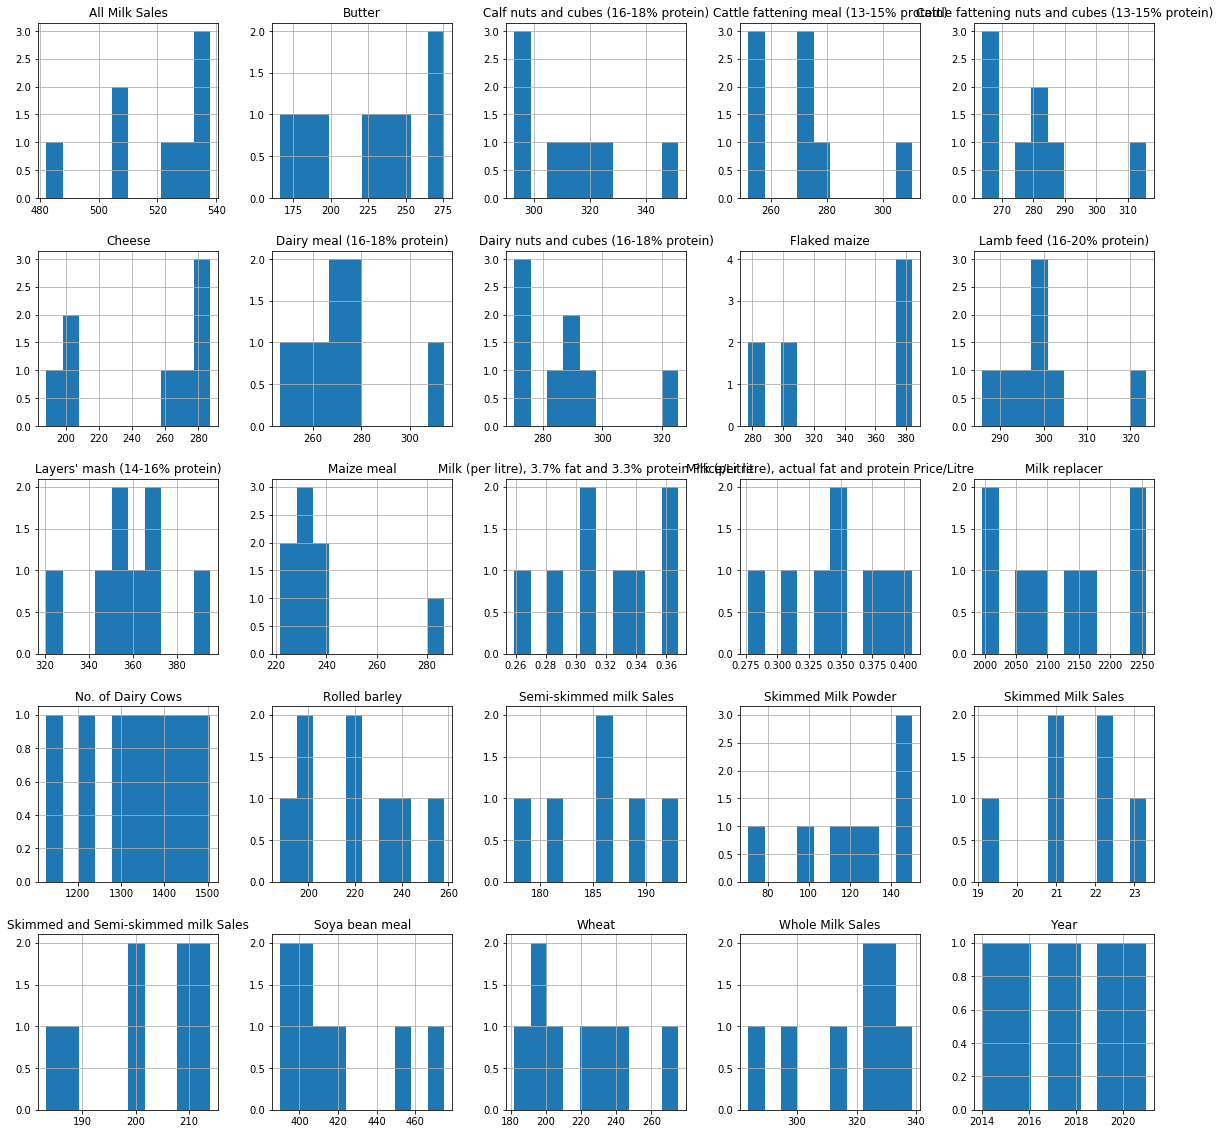

In [62]:
#Visualising the features of the dataset as histograms

Combined_df.hist(figsize=(20,20));

In [63]:
#Assesing descriptive statistics of the dataset

Combined_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,8.0,2017.500000,2.449490,2014.000000,2015.750000,2017.500000,2019.250000,2021.000000
Calf nuts and cubes (16-18% protein),8.0,312.402355,19.502987,292.943505,297.118862,310.469849,319.804977,351.611111
Cattle fattening meal (13-15% protein),8.0,272.112992,19.102920,251.865768,255.293957,273.884572,276.746626,310.483333
Cattle fattening nuts and cubes (13-15% protein),8.0,279.866585,16.911072,263.809414,265.937340,280.258286,282.666754,315.776042
Dairy meal (16-18% protein),8.0,271.907165,19.817877,246.580303,263.117600,271.044192,275.642050,314.008333
Dairy nuts and cubes (16-18% protein),8.0,287.721246,18.207325,270.425864,272.084322,286.823859,292.821217,325.391885
Flaked maize,8.0,336.412326,47.605350,277.416667,299.447917,339.548611,380.546875,383.847222
Lamb feed (16-20% protein),8.0,299.934301,11.103284,285.879272,295.184564,298.742582,301.544634,323.575758
Layers' mash (14-16% protein),8.0,357.873690,21.459153,320.750000,349.908333,357.712121,366.735417,394.895833
Maize meal,8.0,237.867568,20.225068,221.706217,230.106055,232.507784,235.236746,286.660256


In [64]:
#Defining a variable for the correlation of the features of the combined dataset

correlation = Combined_df.corr()

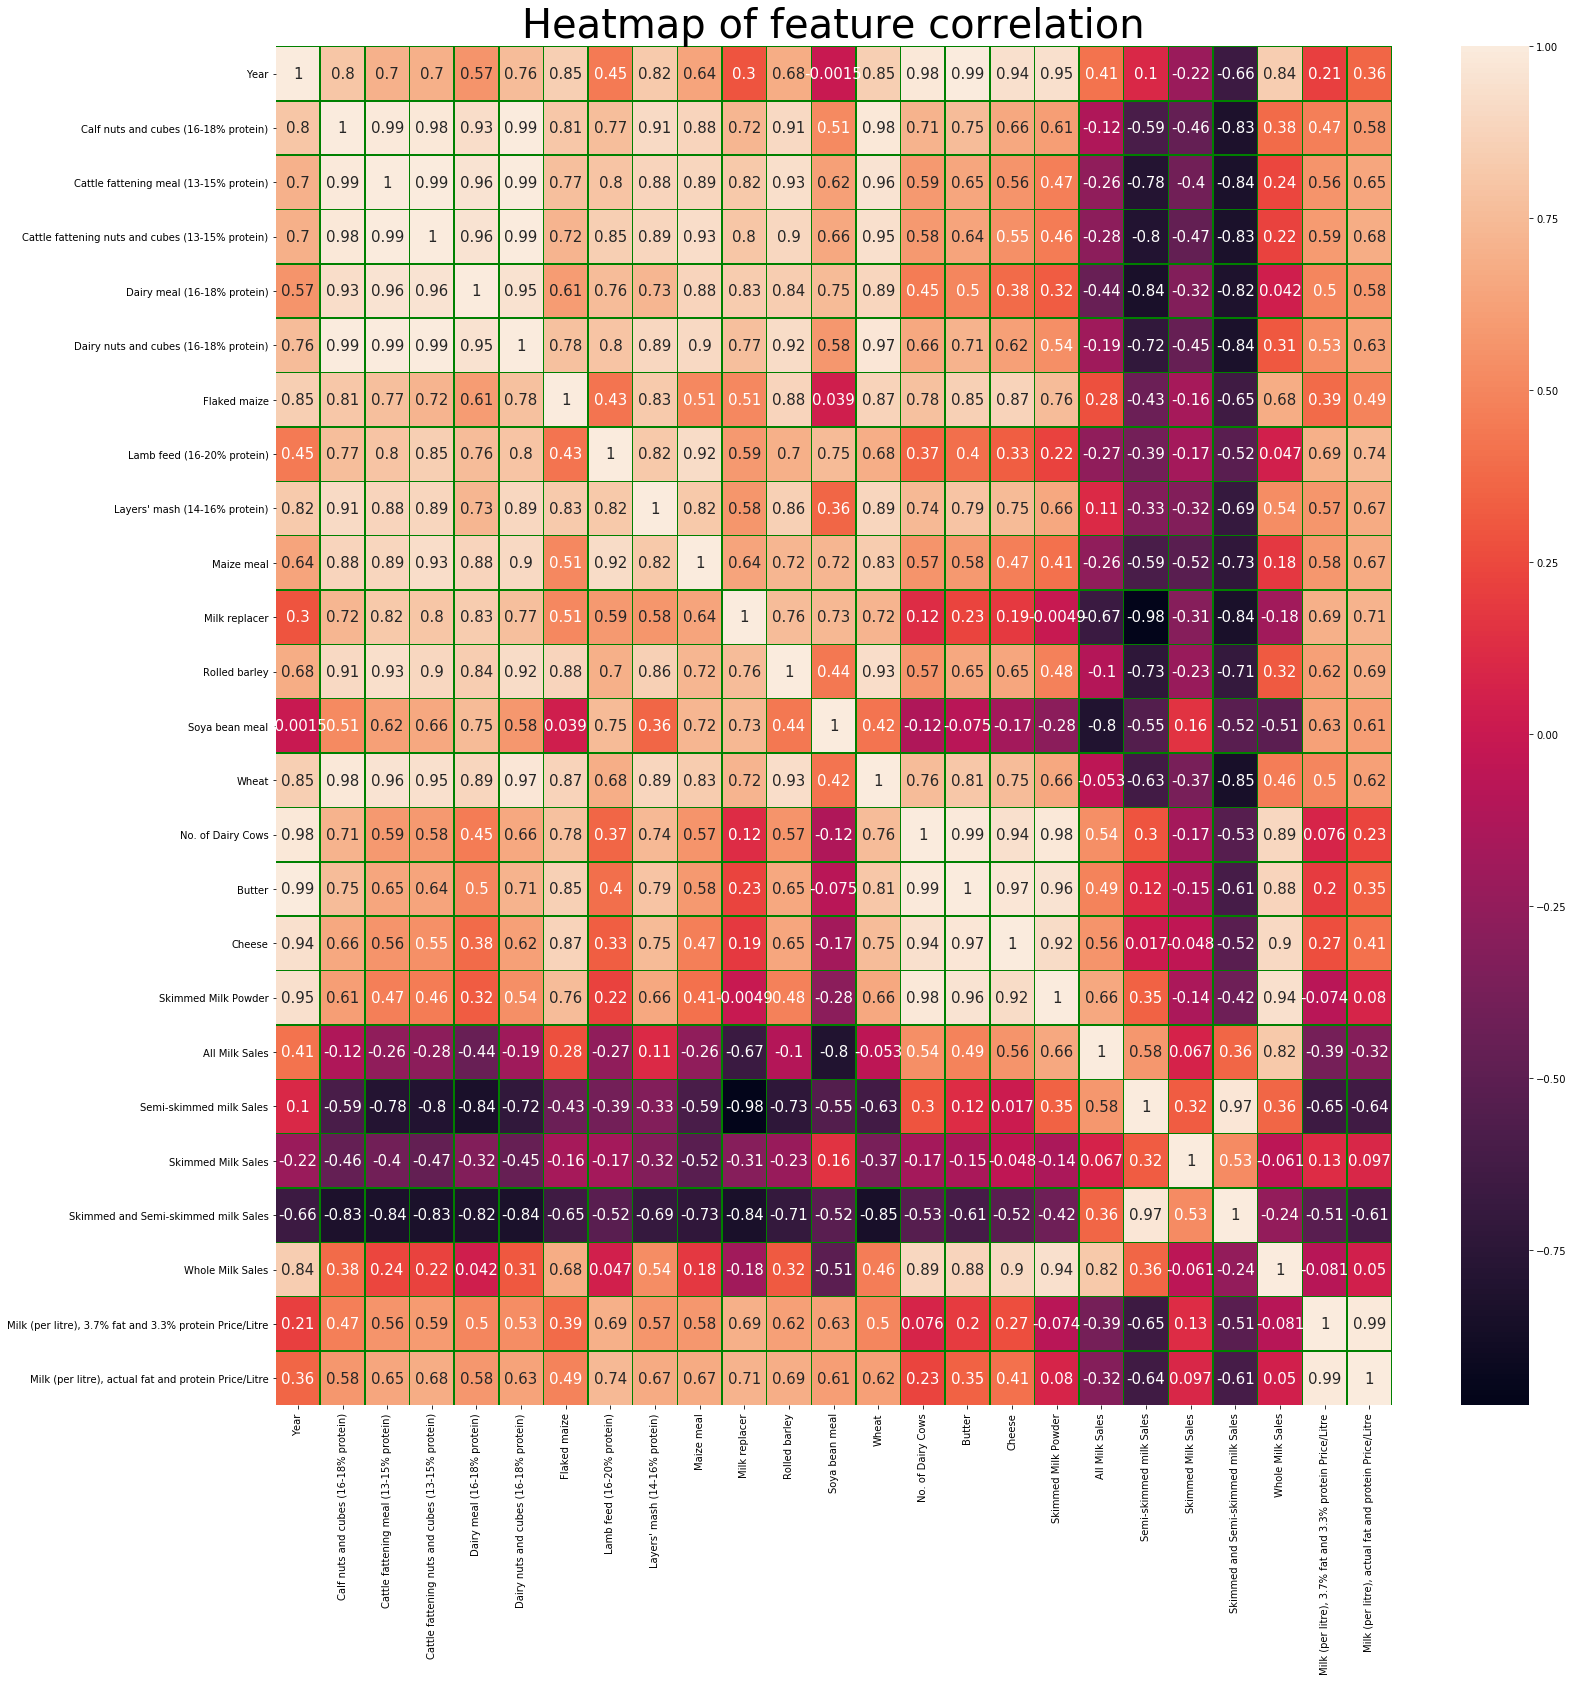

In [65]:
#Plotting correlation of features using a seaborn heatmap to assess how features are correlated with each other

plt.figure(figsize=(25,25))
plt.title('Heatmap of feature correlation', fontsize='40')
sns.heatmap(correlation,annot=True,linecolor="green",lw=0.5, annot_kws={"fontsize":15});

# ------------------------------------------------------------------------

# Section 3-Machine Learning

# ------------------------------------------------------------------------

# Section 3.1 Linear Regression Machine learning model for milk production

In [172]:
#Scaling the data for implementation into Linear regression machine learning models

scaler = StandardScaler()

Combined_df_scaled = pd.DataFrame(scaler.fit_transform(Combined_df),columns=Combined_df.columns)

In [173]:
#Visualising the scaled dataset
Combined_df_scaled 

,Year,Calf nuts and cubes (16-18% protein),Cattle fattening meal (13-15% protein),Cattle fattening nuts and cubes (13-15% protein),Dairy meal (16-18% protein),Dairy nuts and cubes (16-18% protein),Flaked maize,Lamb feed (16-20% protein),Layers' mash (14-16% protein),Maize meal,...,Butter,Cheese,Skimmed Milk Powder,All Milk Sales,Semi-skimmed milk Sales,Skimmed Milk Sales,Skimmed and Semi-skimmed milk Sales,Whole Milk Sales,"Milk (per litre), 3.7% fat and 3.3% protein Price/Litre","Milk (per litre), actual fat and protein Price/Litre"
0,-1.527525,-0.326900,0.067410,0.094296,0.203762,-0.158374,-0.712737,0.393106,-0.315308,-0.147535,...,-1.635677,-1.558779,-2.042899,-2.067202,-1.556942,-0.297867,-0.270982,-1.992319,1.284274,0.956201
1,-1.091089,-1.029588,-0.934796,-1.015065,-0.340163,-0.937685,-1.182139,-1.353245,-1.849416,-0.854247,...,-1.053220,-1.065697,-0.924551,-0.651036,0.193389,0.670200,0.687752,-1.101214,-1.054133,-1.117580
2,-0.654654,-0.773812,-0.960546,-0.857840,-0.876069,-0.911603,-1.324830,-0.333469,-0.641337,-0.525047,...,-0.744048,-1.121069,-0.194681,0.411089,1.471720,-0.446800,1.153157,-0.274175,-1.750088,-1.775120
3,-0.218218,-1.066626,-1.133083,-0.948668,-1.366219,-1.015500,-0.692932,-0.078255,-0.300539,-0.352159,...,-0.053933,0.313351,-0.112276,1.014067,0.763721,0.521267,0.939071,0.494622,0.671834,0.627431
4,0.218218,0.115041,0.130874,-0.044773,-0.102607,0.052994,0.975392,0.075692,0.394040,-0.371989,...,0.335293,0.577031,0.437088,0.947684,0.016389,1.340400,0.687752,0.581985,0.142909,0.071051
5,0.654654,0.587476,0.505649,0.398983,0.200710,0.538610,1.065217,-0.151227,0.583762,-0.113628,...,0.694153,0.814343,0.778479,0.754067,-0.888276,-1.787200,-0.131361,0.774184,-0.302502,-0.207139
6,1.091089,0.345202,0.177196,0.103025,0.009503,0.219724,0.833791,-0.828847,0.284441,-0.214449,...,1.078685,0.998920,1.078275,0.322579,NaN,NaN,-1.369338,1.211000,-0.239655,-0.051948
7,1.527525,2.149205,2.147296,2.270041,2.271083,2.211835,1.038238,2.276244,1.844357,2.579056,...,1.378747,1.041899,0.980566,-0.731248,NaN,NaN,-1.696052,0.305917,1.247361,1.497104


In [174]:
# Removing columns with null values to prevent them effecting the model

Combined_df_scaled.drop(["Semi-skimmed milk Sales", "Skimmed Milk Sales"], axis=1, inplace =True) 

In [175]:
#Defining X and y variables to be used in the machine learning algorithm

y = Combined_df['All Milk Sales']
X = Combined_df_scaled.drop(['All Milk Sales'],axis=1)

In [176]:
# Splitting the dataset into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4, random_state=80)

In [177]:
#visualiising the shape of the train and test sets

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4, 22)
(4, 22)
(4,)
(4,)


In [178]:
#Defining the Linear regression model as lrm and fitting it to the training sets

lrm = LinearRegression()
lrm.fit(X_train, Y_train) #fit an OLS model

LinearRegression()

In [179]:
#Defining accuracy predictions for the X_train and X_test

y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

In [180]:
#Displaying the model accuracy and RMSE of the model

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test) / Y_test)) * 100))

R-squared of the model in training set is: 1.0
-----Test set statistics-----
R-squared of the model in test set is: -0.21001423361662797
Root mean squared error of the prediction is: 21.54574054636869
Mean absolute percentage error of the prediction is: 3.3365954077369127


# Section 3.2 Decision Tree Regressor

In [181]:
#Importing Decision Tree Regressor abd fitting it t the training sets
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [182]:
#Defining the prediction variable for the decision tree regression model

y_pred_DT = DTregressor.predict(X_test)

In [183]:
#Printing R squared, RMSE and MAPE from DTRegressor model

print("R-squared of the model in training set is: {}".format(DTregressor.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(DTregressor.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(Y_test, y_pred_DT)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_pred_DT) / Y_test)) * 100))

R-squared of the model in training set is: 1.0
-----Test set statistics-----
R-squared of the model in test set is: -0.7925520823151431
Root mean squared error of the prediction is: 26.224189691961882
Mean absolute percentage error of the prediction is: 4.3384974712386555


# Section 3.2 Random Forest Regressor

In [184]:
#Impoting random forest regressor and definign the model, fitting it to the training data

from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor(n_estimators=100)
RFregressor.fit(X_train, Y_train)

RandomForestRegressor()

In [185]:
y_pred_RF = RFregressor.predict(X_test)

In [186]:
#printing the R squared, RMSE and MAPE of the model

print("R-squared of the model in training set is: {}".format(RFregressor.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(RFregressor.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(Y_test, y_pred_RF)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_pred_RF) / Y_test)) * 100))

R-squared of the model in training set is: 0.7498573637105967
-----Test set statistics-----
R-squared of the model in test set is: -0.8315051280798051
Root mean squared error of the prediction is: 26.50759067936952
Mean absolute percentage error of the prediction is: 3.777406112240834


# Section 3.3 Further Data preparation 

Given the poor accruacy of the model to predict Milk sales it was chosen to decrease the model complexity by utilizing dimensionality reduction by removing features which may be adding unnecessary complexity to the model there by reducing the models performance and accuracy.

A new dataset which detailed the number of tonnes of milk produced by ireland on a yearly basis was acquired from Data.gov and added to the dataset to generate a new target variable for which the dataset may have a better accuracy in predicting.

In [187]:
# Remvoing feedstuff which is not directly related to dairy to reduce model complexity

Combined_df_adjusted = Combined_df.drop(Combined_df.columns[[6,7,8]], axis=1)

In [188]:
#Visualising the dataframe

Combined_df_adjusted

,Year,Calf nuts and cubes (16-18% protein),Cattle fattening meal (13-15% protein),Cattle fattening nuts and cubes (13-15% protein),Dairy meal (16-18% protein),Dairy nuts and cubes (16-18% protein),Maize meal,Milk replacer,Rolled barley,Soya bean meal,...,Butter,Cheese,Skimmed Milk Powder,All Milk Sales,Semi-skimmed milk Sales,Skimmed Milk Sales,Skimmed and Semi-skimmed milk Sales,Whole Milk Sales,"Milk (per litre), 3.7% fat and 3.3% protein Price/Litre","Milk (per litre), actual fat and protein Price/Litre"
0,2014,306.438601,273.317549,281.358238,275.684488,285.023908,235.076376,2252.300084,222.231076,457.526419,...,166.40,188.40,70.60,482.20,177.6,21.1,198.60,283.60,0.368000,0.385000
1,2015,293.619199,255.408992,263.809414,265.601245,271.751159,221.706217,2073.481482,198.543899,416.939240,...,187.50,207.10,99.10,507.80,186.5,22.4,208.90,298.90,0.284000,0.303000
2,2016,298.285417,254.948852,266.296540,255.666667,272.195376,227.934295,1996.265467,187.929060,405.003114,...,198.70,205.00,117.70,527.00,193.0,20.9,213.90,313.10,0.259000,0.277000
3,2017,292.943505,251.865768,264.859740,246.580303,270.425864,231.205128,2013.688131,200.410192,397.736111,...,223.70,259.40,119.80,537.90,189.4,22.2,211.60,326.30,0.346000,0.372000
4,2018,314.501096,274.451596,279.158333,270.005050,288.623809,230.829976,2090.957151,236.861111,408.811111,...,237.80,269.40,133.80,536.70,185.6,23.3,208.90,327.80,0.327000,0.350000
5,2019,323.119907,281.148514,286.178047,275.627904,296.894518,235.717857,2148.091468,241.978248,390.052839,...,250.80,278.40,142.50,533.20,181.0,19.1,200.10,331.10,0.311000,0.339000
6,2020,318.700000,275.279330,281.496323,272.083333,291.463450,233.810440,2160.941477,220.745833,398.968434,...,264.73,285.40,150.14,525.40,NaN,NaN,186.80,338.60,0.313258,0.345136
7,2021,351.611111,310.483333,315.776042,314.008333,325.391885,286.660256,2257.000000,258.083333,474.962121,...,275.60,287.03,147.65,506.35,NaN,NaN,183.29,323.06,0.366674,0.406388


In [189]:
Combined_df_adjusted1 = Combined_df_adjusted.drop(Combined_df_adjusted.columns[[6,7,8,9]], axis=1)

In [190]:
#Visualising the dataset

Combined_df_adjusted1

,Year,Calf nuts and cubes (16-18% protein),Cattle fattening meal (13-15% protein),Cattle fattening nuts and cubes (13-15% protein),Dairy meal (16-18% protein),Dairy nuts and cubes (16-18% protein),Wheat,No. of Dairy Cows,Butter,Cheese,Skimmed Milk Powder,All Milk Sales,Semi-skimmed milk Sales,Skimmed Milk Sales,Skimmed and Semi-skimmed milk Sales,Whole Milk Sales,"Milk (per litre), 3.7% fat and 3.3% protein Price/Litre","Milk (per litre), actual fat and protein Price/Litre"
0,2014,306.438601,273.317549,281.358238,275.684488,285.023908,203.406746,1127.7,166.40,188.40,70.60,482.20,177.6,21.1,198.60,283.60,0.368000,0.385000
1,2015,293.619199,255.408992,263.809414,265.601245,271.751159,192.248512,1239.9,187.50,207.10,99.10,507.80,186.5,22.4,208.90,298.90,0.284000,0.303000
2,2016,298.285417,254.948852,266.296540,255.666667,272.195376,182.134921,1295.2,198.70,205.00,117.70,527.00,193.0,20.9,213.90,313.10,0.259000,0.277000
3,2017,292.943505,251.865768,264.859740,246.580303,270.425864,192.619213,1343.3,223.70,259.40,119.80,537.90,189.4,22.2,211.60,326.30,0.346000,0.372000
4,2018,314.501096,274.451596,279.158333,270.005050,288.623809,221.038690,1369.1,237.80,269.40,133.80,536.70,185.6,23.3,208.90,327.80,0.327000,0.350000
5,2019,323.119907,281.148514,286.178047,275.627904,296.894518,238.520833,1425.8,250.80,278.40,142.50,533.20,181.0,19.1,200.10,331.10,0.311000,0.339000
6,2020,318.700000,275.279330,281.496323,272.083333,291.463450,232.248512,1456.0,264.73,285.40,150.14,525.40,NaN,NaN,186.80,338.60,0.313258,0.345136
7,2021,351.611111,310.483333,315.776042,314.008333,325.391885,275.135417,1505.3,275.60,287.03,147.65,506.35,NaN,NaN,183.29,323.06,0.366674,0.406388


In [191]:
#Visualising the descriptive statisitcs of the new dataset
Combined_df_adjusted1.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,8.0,2017.500000,2.449490,2014.000000,2015.750000,2017.500000,2019.250000,2021.000000
Calf nuts and cubes (16-18% protein),8.0,312.402355,19.502987,292.943505,297.118862,310.469849,319.804977,351.611111
Cattle fattening meal (13-15% protein),8.0,272.112992,19.102920,251.865768,255.293957,273.884572,276.746626,310.483333
Cattle fattening nuts and cubes (13-15% protein),8.0,279.866585,16.911072,263.809414,265.937340,280.258286,282.666754,315.776042
Dairy meal (16-18% protein),8.0,271.907165,19.817877,246.580303,263.117600,271.044192,275.642050,314.008333
Dairy nuts and cubes (16-18% protein),8.0,287.721246,18.207325,270.425864,272.084322,286.823859,292.821217,325.391885
Wheat,8.0,217.169105,30.935143,182.134921,192.526538,212.222718,233.816592,275.135417
No. of Dairy Cows,8.0,1345.287500,122.983221,1127.700000,1281.375000,1356.200000,1433.350000,1505.300000
Butter,8.0,225.653750,38.727037,166.400000,195.900000,230.750000,254.282500,275.600000
Cheese,8.0,247.516250,40.543238,188.400000,206.575000,264.400000,280.150000,287.030000


In [192]:
#Removing columns with null values which were missed in the initial analysis

Combined_df_adjusted1.drop(["Semi-skimmed milk Sales", "Skimmed Milk Sales"], axis=1,inplace=True)

In [193]:
#Reading in the new agricultural output dataset from data.gov to add a new target variable, Milk production

Agricultural_output_df = pd.read_csv("Quantity of agriculutral output.csv")

In [194]:
#Visualising the dataset

Agricultural_output_df

,Statistic Label,Year,State,UNIT,VALUE
0,Livestock - Cattle,1990,State,000 Head,1888.0
1,Livestock - Cattle,1991,State,000 Head,1894.0
2,Livestock - Cattle,1992,State,000 Head,1977.0
3,Livestock - Cattle,1993,State,000 Head,1997.0
4,Livestock - Cattle,1994,State,000 Head,1908.0
...,...,...,...,...,...
411,Crops - Turf,2017,State,000 Tonnes,0.0
412,Crops - Turf,2018,State,000 Tonnes,0.0
413,Crops - Turf,2019,State,000 Tonnes,0.0
414,Crops - Turf,2020,State,000 Tonnes,0.0


In [195]:
#Viewing the labels for the agricultural outputs in the new dataset

Agricultural_output_df["Statistic Label"].unique()

array(['Livestock - Cattle', 'Livestock - Pigs', 'Livestock - Sheep',
       'Livestock - Poultry', 'Livestock Products - Milk',
       'Livestock Products - Eggs', 'Crops - Barley', 'Crops - Wheat',
       'Crops - Oats', 'Crops - Potatoes', 'Crops - Sugar Beet',
       'Crops - Mushrooms', 'Crops - Turf'], dtype=object)

In [196]:
#Simplifying the column name for Statisitic Label to Label
Agricultural_output_df.rename(columns = {'Statistic Label':'Label'}, inplace = True)

In [197]:
#Visualising the dataset

Agricultural_output_df

,Label,Year,State,UNIT,VALUE
0,Livestock - Cattle,1990,State,000 Head,1888.0
1,Livestock - Cattle,1991,State,000 Head,1894.0
2,Livestock - Cattle,1992,State,000 Head,1977.0
3,Livestock - Cattle,1993,State,000 Head,1997.0
4,Livestock - Cattle,1994,State,000 Head,1908.0
...,...,...,...,...,...
411,Crops - Turf,2017,State,000 Tonnes,0.0
412,Crops - Turf,2018,State,000 Tonnes,0.0
413,Crops - Turf,2019,State,000 Tonnes,0.0
414,Crops - Turf,2020,State,000 Tonnes,0.0


In [198]:
#Isolating the milk production values from the new output dataset

Agricultural_output_df1 = Agricultural_output_df.query("Label =='Livestock Products - Milk'")

In [199]:
#Visualising the dataset

Agricultural_output_df1

,Label,Year,State,UNIT,VALUE
128,Livestock Products - Milk,1990,State,Million Litres,5179.000000
129,Livestock Products - Milk,1991,State,Million Litres,5123.000000
130,Livestock Products - Milk,1992,State,Million Litres,5167.000000
131,Livestock Products - Milk,1993,State,Million Litres,5109.000000
132,Livestock Products - Milk,1994,State,Million Litres,5176.000000
133,Livestock Products - Milk,1995,State,Million Litres,5187.000000
134,Livestock Products - Milk,1996,State,Million Litres,5194.000000
135,Livestock Products - Milk,1997,State,Million Litres,5151.000000
136,Livestock Products - Milk,1998,State,Million Litres,4990.000000
137,Livestock Products - Milk,1999,State,Million Litres,5018.000000


In [200]:
#Merging the original dataset with the Milk production dataset

Combined_df_adjusted2 = pd.merge(Combined_df_adjusted1, Agricultural_output_df1)

In [201]:
#Visualising the dataset

Combined_df_adjusted2

,Year,Calf nuts and cubes (16-18% protein),Cattle fattening meal (13-15% protein),Cattle fattening nuts and cubes (13-15% protein),Dairy meal (16-18% protein),Dairy nuts and cubes (16-18% protein),Wheat,No. of Dairy Cows,Butter,Cheese,Skimmed Milk Powder,All Milk Sales,Skimmed and Semi-skimmed milk Sales,Whole Milk Sales,"Milk (per litre), 3.7% fat and 3.3% protein Price/Litre","Milk (per litre), actual fat and protein Price/Litre",Label,State,UNIT,VALUE
0,2014,306.438601,273.317549,281.358238,275.684488,285.023908,203.406746,1127.7,166.40,188.40,70.60,482.20,198.60,283.60,0.368000,0.385000,Livestock Products - Milk,State,Million Litres,5666.000000
1,2015,293.619199,255.408992,263.809414,265.601245,271.751159,192.248512,1239.9,187.50,207.10,99.10,507.80,208.90,298.90,0.284000,0.303000,Livestock Products - Milk,State,Million Litres,6413.000000
2,2016,298.285417,254.948852,266.296540,255.666667,272.195376,182.134921,1295.2,198.70,205.00,117.70,527.00,213.90,313.10,0.259000,0.277000,Livestock Products - Milk,State,Million Litres,6671.000000
3,2017,292.943505,251.865768,264.859740,246.580303,270.425864,192.619213,1343.3,223.70,259.40,119.80,537.90,211.60,326.30,0.346000,0.372000,Livestock Products - Milk,State,Million Litres,7279.666249
4,2018,314.501096,274.451596,279.158333,270.005050,288.623809,221.038690,1369.1,237.80,269.40,133.80,536.70,208.90,327.80,0.327000,0.350000,Livestock Products - Milk,State,Million Litres,7601.928549
5,2019,323.119907,281.148514,286.178047,275.627904,296.894518,238.520833,1425.8,250.80,278.40,142.50,533.20,200.10,331.10,0.311000,0.339000,Livestock Products - Milk,State,Million Litres,8002.776031
6,2020,318.700000,275.279330,281.496323,272.083333,291.463450,232.248512,1456.0,264.73,285.40,150.14,525.40,186.80,338.60,0.313258,0.345136,Livestock Products - Milk,State,Million Litres,8311.565479
7,2021,351.611111,310.483333,315.776042,314.008333,325.391885,275.135417,1505.3,275.60,287.03,147.65,506.35,183.29,323.06,0.366674,0.406388,Livestock Products - Milk,State,Million Litres,8773.700055


In [202]:
#Dropping unnecessary columns

Combined_df_adjusted2.drop(['Label', 'State', 'UNIT'],axis= 1,inplace =True)

In [203]:
#Renaming columns with appropriate feature names

Combined_df_adjusted2.rename(columns={'VALUE': 'Milk Output (million litres)'}, inplace = True)

In [204]:
#Visualising the dataset

Combined_df_adjusted2

,Year,Calf nuts and cubes (16-18% protein),Cattle fattening meal (13-15% protein),Cattle fattening nuts and cubes (13-15% protein),Dairy meal (16-18% protein),Dairy nuts and cubes (16-18% protein),Wheat,No. of Dairy Cows,Butter,Cheese,Skimmed Milk Powder,All Milk Sales,Skimmed and Semi-skimmed milk Sales,Whole Milk Sales,"Milk (per litre), 3.7% fat and 3.3% protein Price/Litre","Milk (per litre), actual fat and protein Price/Litre",Milk Output (million litres)
0,2014,306.438601,273.317549,281.358238,275.684488,285.023908,203.406746,1127.7,166.40,188.40,70.60,482.20,198.60,283.60,0.368000,0.385000,5666.000000
1,2015,293.619199,255.408992,263.809414,265.601245,271.751159,192.248512,1239.9,187.50,207.10,99.10,507.80,208.90,298.90,0.284000,0.303000,6413.000000
2,2016,298.285417,254.948852,266.296540,255.666667,272.195376,182.134921,1295.2,198.70,205.00,117.70,527.00,213.90,313.10,0.259000,0.277000,6671.000000
3,2017,292.943505,251.865768,264.859740,246.580303,270.425864,192.619213,1343.3,223.70,259.40,119.80,537.90,211.60,326.30,0.346000,0.372000,7279.666249
4,2018,314.501096,274.451596,279.158333,270.005050,288.623809,221.038690,1369.1,237.80,269.40,133.80,536.70,208.90,327.80,0.327000,0.350000,7601.928549
5,2019,323.119907,281.148514,286.178047,275.627904,296.894518,238.520833,1425.8,250.80,278.40,142.50,533.20,200.10,331.10,0.311000,0.339000,8002.776031
6,2020,318.700000,275.279330,281.496323,272.083333,291.463450,232.248512,1456.0,264.73,285.40,150.14,525.40,186.80,338.60,0.313258,0.345136,8311.565479
7,2021,351.611111,310.483333,315.776042,314.008333,325.391885,275.135417,1505.3,275.60,287.03,147.65,506.35,183.29,323.06,0.366674,0.406388,8773.700055


# Section 3.4 Machine learning with new target variable, Milk production

In [228]:
#Scaling the new dataset for incorporation into machine learning models

scaler = StandardScaler()

Combined_df_adjusted2_scaled = pd.DataFrame(scaler.fit_transform(Combined_df_adjusted2),columns=Combined_df_adjusted2.columns)

In [229]:
#Defining X and y variable for machine learning

y = Combined_df_adjusted2['All Milk Sales']
X = Combined_df_adjusted2_scaled.drop(['All Milk Sales'],axis=1)

In [230]:
#splitting the training and testing data with a test size of 40%

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4, random_state=80)

In [231]:
#Defining the Linear regression model as lrm and fitting it to the training sets

lrm = LinearRegression()
lrm.fit(X_train, Y_train) #fit an OLS model

LinearRegression()

In [232]:
#Defining accuracy predictions for the X_train and X_test

y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

In [233]:
#Displaying the model accuracy and RMSE of the model

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test) / Y_test)) * 100))

R-squared of the model in training set is: 1.0
-----Test set statistics-----
R-squared of the model in test set is: 0.9028631849832812
Root mean squared error of the prediction is: 6.1046127018121865
Mean absolute percentage error of the prediction is: 0.9762369362276359


In [236]:
#Printing the cross validation scores from the linear regression model
lm = LinearRegression()
scores = cross_val_score(lm, X_train, Y_train, scoring='r2', cv=4)
scores

/Users/gavindavis/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/gavindavis/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/gavindavis/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/gavindavis/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


array([nan, nan, nan, nan])

# Section 3.4.1 Principal component analysis

In [237]:
#Improting PCA from sklearn

from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-2.881971,4.073315,0.381356,0.246474,0.150132,-0.156120,0.003816,1.813508e-16
1,-3.697585,0.072161,-0.927800,0.158554,-0.074618,0.457620,-0.003250,1.813508e-16
2,-3.410920,-1.467046,-1.375140,-0.222568,-0.190244,-0.336648,-0.003605,1.813508e-16
3,-1.683001,-1.137571,2.208213,-0.112713,-0.240635,0.014980,0.049617,1.813508e-16
4,0.592995,-0.752748,0.449565,-0.705237,0.247300,0.034558,-0.140084,1.813508e-16


In [238]:
#Defining X and y for ML model implementation

y = Combined_df_adjusted1['All Milk Sales']
X = X_pca

In [239]:
#Splitting the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4, random_state=80)

In [240]:
#Defining the Linear regression model as lrm and fitting it to the training sets

lrm = LinearRegression()
lrm.fit(X_train, Y_train) #fit an OLS model

LinearRegression()

In [241]:
#Defining accuracy predictions for the X_train and X_test

y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

In [242]:
#Displaying the model accuracy and RMSE of the model

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test) / Y_test)) * 100))

R-squared of the model in training set is: 1.0
-----Test set statistics-----
R-squared of the model in test set is: 0.9028631849832793
Root mean squared error of the prediction is: 6.104612701812246
Mean absolute percentage error of the prediction is: 0.9762369362276445


In [243]:
#Displaying the cross validation scores

scores = cross_val_score(lrm, X_train, Y_train, scoring='r2', cv=4)
scores

/Users/gavindavis/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/gavindavis/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/gavindavis/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/gavindavis/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


array([nan, nan, nan, nan])

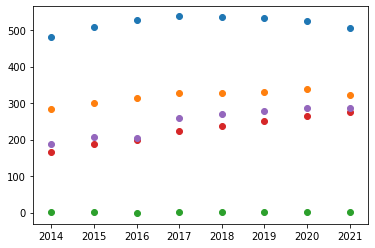

In [244]:
fig = plt.scatter(Combined_df_adjusted1["Year"], Combined_df_adjusted1["All Milk Sales"])

plt.scatter(Combined_df_adjusted1["Year"], Combined_df_adjusted1["Whole Milk Sales"])
plt.scatter(Combined_df_adjusted1["Year"], Combined_df_adjusted1["Milk (per litre), 3.7% fat and 3.3% protein Price/Litre"])
plt.scatter(Combined_df_adjusted1["Year"], Combined_df_adjusted1["Butter"])
plt.scatter(Combined_df_adjusted1["Year"], Combined_df_adjusted1["Cheese"])


In [245]:
#Using select K best to try and extract the best features to increase model performance

from sklearn.feature_selection import SelectKBest, f_regression

X_best = SelectKBest(f_regression, k=5).fit_transform(X,y)


'\nAfter the code snippet is run, X_best keeps top k=5 features from X.\n'

In [246]:
#Visualising X best

X_best

array([[-2.88197086,  4.07331473,  0.38135563,  0.24647436,  0.15013241],
       [-3.69758467,  0.07216066, -0.92780024,  0.15855445, -0.07461764],
       [-3.41091956, -1.46704619, -1.37514037, -0.22256786, -0.19024424],
       [-1.68300143, -1.13757107,  2.20821328, -0.11271342, -0.24063455],
       [ 0.59299507, -0.75274812,  0.44956471, -0.70523667,  0.24729984],
       [ 2.05615379, -0.98631937, -0.35517898, -0.24899829,  0.32503137],
       [ 2.54373314, -1.59451131,  0.09467464,  1.13137874,  0.07772935],
       [ 6.48059451,  1.79272066, -0.47568866, -0.2468913 , -0.29469653]])

In [247]:
#Splitting the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X_best, y, test_size=0.4, random_state=80)

In [248]:
#Defining the linear regression model and fitting it to the training data

lrm = LinearRegression()
lrm.fit(X_train, Y_train) #fit an OLS model

LinearRegression()

In [249]:
#Defining accuracy predictions for the X_train and X_test

y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

In [250]:
#Displaying the model accuracy and RMSE of the model

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test) / Y_test)) * 100))

R-squared of the model in training set is: 1.0
-----Test set statistics-----
R-squared of the model in test set is: 0.9418074869764524
Root mean squared error of the prediction is: 4.724977475099906
Mean absolute percentage error of the prediction is: 0.7522323242179496


In [251]:
#Visualising the dataset

Combined_df_adjusted2

,Year,Calf nuts and cubes (16-18% protein),Cattle fattening meal (13-15% protein),Cattle fattening nuts and cubes (13-15% protein),Dairy meal (16-18% protein),Dairy nuts and cubes (16-18% protein),Wheat,No. of Dairy Cows,Butter,Cheese,Skimmed Milk Powder,All Milk Sales,Skimmed and Semi-skimmed milk Sales,Whole Milk Sales,"Milk (per litre), 3.7% fat and 3.3% protein Price/Litre","Milk (per litre), actual fat and protein Price/Litre",Milk Output (million litres)
0,2014,306.438601,273.317549,281.358238,275.684488,285.023908,203.406746,1127.7,166.40,188.40,70.60,482.20,198.60,283.60,0.368000,0.385000,5666.000000
1,2015,293.619199,255.408992,263.809414,265.601245,271.751159,192.248512,1239.9,187.50,207.10,99.10,507.80,208.90,298.90,0.284000,0.303000,6413.000000
2,2016,298.285417,254.948852,266.296540,255.666667,272.195376,182.134921,1295.2,198.70,205.00,117.70,527.00,213.90,313.10,0.259000,0.277000,6671.000000
3,2017,292.943505,251.865768,264.859740,246.580303,270.425864,192.619213,1343.3,223.70,259.40,119.80,537.90,211.60,326.30,0.346000,0.372000,7279.666249
4,2018,314.501096,274.451596,279.158333,270.005050,288.623809,221.038690,1369.1,237.80,269.40,133.80,536.70,208.90,327.80,0.327000,0.350000,7601.928549
5,2019,323.119907,281.148514,286.178047,275.627904,296.894518,238.520833,1425.8,250.80,278.40,142.50,533.20,200.10,331.10,0.311000,0.339000,8002.776031
6,2020,318.700000,275.279330,281.496323,272.083333,291.463450,232.248512,1456.0,264.73,285.40,150.14,525.40,186.80,338.60,0.313258,0.345136,8311.565479
7,2021,351.611111,310.483333,315.776042,314.008333,325.391885,275.135417,1505.3,275.60,287.03,147.65,506.35,183.29,323.06,0.366674,0.406388,8773.700055


In [252]:
#Reducing data complexity by removing feed stuff features to attempt to increase accuracy

Combined_df_adjusted3 = Combined_df_adjusted2.drop(["Calf nuts and cubes (16-18% protein)",
                                                   "Cattle fattening meal (13-15% protein)",
                                                   "Cattle fattening nuts and cubes (13-15% protein)",
                                                   "Wheat",
                                                   ], axis=1)

In [253]:
#Visualising the dataset

Combined_df_adjusted3

,Year,Dairy meal (16-18% protein),Dairy nuts and cubes (16-18% protein),No. of Dairy Cows,Butter,Cheese,Skimmed Milk Powder,All Milk Sales,Skimmed and Semi-skimmed milk Sales,Whole Milk Sales,"Milk (per litre), 3.7% fat and 3.3% protein Price/Litre","Milk (per litre), actual fat and protein Price/Litre",Milk Output (million litres)
0,2014,275.684488,285.023908,1127.7,166.40,188.40,70.60,482.20,198.60,283.60,0.368000,0.385000,5666.000000
1,2015,265.601245,271.751159,1239.9,187.50,207.10,99.10,507.80,208.90,298.90,0.284000,0.303000,6413.000000
2,2016,255.666667,272.195376,1295.2,198.70,205.00,117.70,527.00,213.90,313.10,0.259000,0.277000,6671.000000
3,2017,246.580303,270.425864,1343.3,223.70,259.40,119.80,537.90,211.60,326.30,0.346000,0.372000,7279.666249
4,2018,270.005050,288.623809,1369.1,237.80,269.40,133.80,536.70,208.90,327.80,0.327000,0.350000,7601.928549
5,2019,275.627904,296.894518,1425.8,250.80,278.40,142.50,533.20,200.10,331.10,0.311000,0.339000,8002.776031
6,2020,272.083333,291.463450,1456.0,264.73,285.40,150.14,525.40,186.80,338.60,0.313258,0.345136,8311.565479
7,2021,314.008333,325.391885,1505.3,275.60,287.03,147.65,506.35,183.29,323.06,0.366674,0.406388,8773.700055


In [254]:
#Defining correlation variable for the new dataset with milk production

correlation = Combined_df_adjusted3.corr()

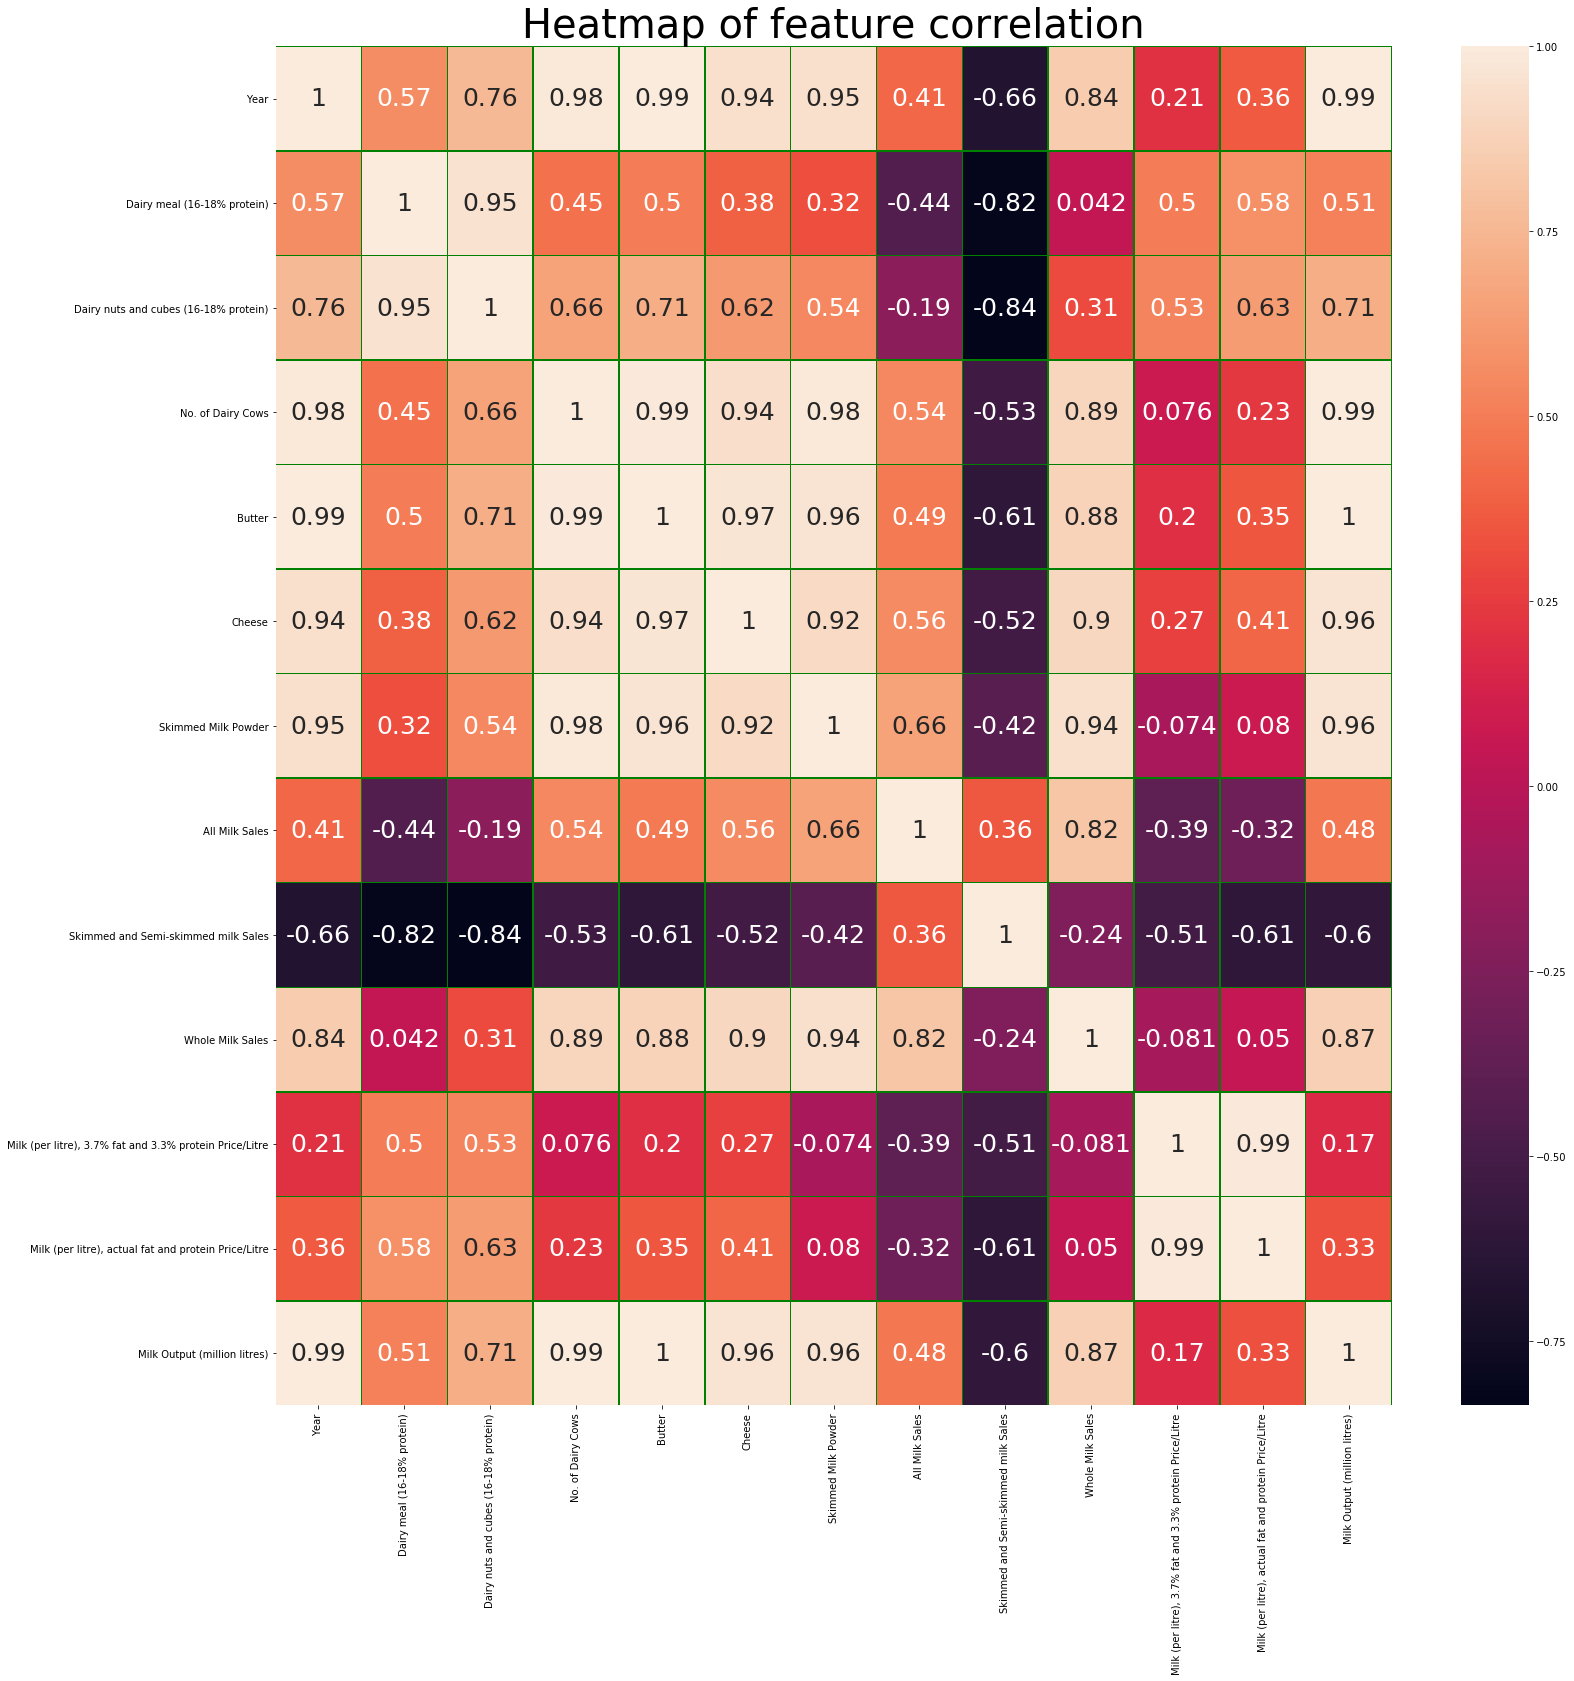

In [255]:
#Visualising correlation of variables with a correlation heatmap

plt.figure(figsize=(25,25))
plt.title('Heatmap of feature correlation', fontsize='40')
sns.heatmap(correlation,annot=True,linecolor="green",lw=0.5, annot_kws={"fontsize":25});

In [256]:
#Removing poorly correlated variables

Combined_df_adjusted4 =Combined_df_adjusted3.drop(["Skimmed and Semi-skimmed milk Sales"],axis=1)

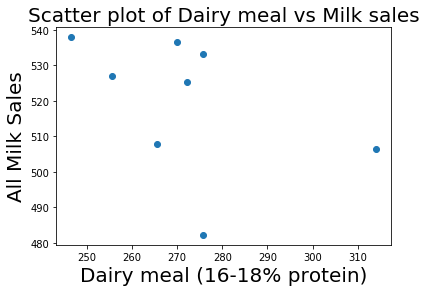

In [257]:
#Assessing correlation or lack there of of dairy meal and milk sales

x = Combined_df_adjusted4["Dairy meal (16-18% protein)"]
y = Combined_df_adjusted4["All Milk Sales"]

plt.scatter(x, y)
plt.xlabel("Dairy meal (16-18% protein)", fontsize="20")
plt.ylabel("All Milk Sales", fontsize="20")
plt.title("Scatter plot of Dairy meal vs Milk sales", fontsize="20")
plt.show()

In [258]:
#Removing poorly correlated variables

Combined_df_adjusted5 =Combined_df_adjusted4.drop([
                                                  "Dairy meal (16-18% protein)",
                                                  "Dairy nuts and cubes (16-18% protein)"],axis=1)

In [259]:
#Visualising the new dataset

Combined_df_adjusted5 

,Year,No. of Dairy Cows,Butter,Cheese,Skimmed Milk Powder,All Milk Sales,Whole Milk Sales,"Milk (per litre), 3.7% fat and 3.3% protein Price/Litre","Milk (per litre), actual fat and protein Price/Litre",Milk Output (million litres)
0,2014,1127.7,166.40,188.40,70.60,482.20,283.60,0.368000,0.385000,5666.000000
1,2015,1239.9,187.50,207.10,99.10,507.80,298.90,0.284000,0.303000,6413.000000
2,2016,1295.2,198.70,205.00,117.70,527.00,313.10,0.259000,0.277000,6671.000000
3,2017,1343.3,223.70,259.40,119.80,537.90,326.30,0.346000,0.372000,7279.666249
4,2018,1369.1,237.80,269.40,133.80,536.70,327.80,0.327000,0.350000,7601.928549
5,2019,1425.8,250.80,278.40,142.50,533.20,331.10,0.311000,0.339000,8002.776031
6,2020,1456.0,264.73,285.40,150.14,525.40,338.60,0.313258,0.345136,8311.565479
7,2021,1505.3,275.60,287.03,147.65,506.35,323.06,0.366674,0.406388,8773.700055


In [260]:
#Scaling the dataset

scaler = StandardScaler()

Combined_df_adjusted5_scaled = pd.DataFrame(scaler.fit_transform(Combined_df_adjusted5),columns=Combined_df_adjusted5.columns)

In [261]:
#Defining X and y for implementation of Machine learning models

y = Combined_df_adjusted5['Milk Output (million litres)']
X = Combined_df_adjusted5_scaled.drop(['Milk Output (million litres)'],axis=1)

In [262]:
#Splitting the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4, random_state=80)

In [263]:
#Defining the Linear regression model as lrm and fitting it to the training sets

lrm = LinearRegression()
lrm.fit(X_train, Y_train) #fit an OLS model

LinearRegression()

In [264]:
#Defining accuracy predictions for the X_train and X_test

y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

In [265]:
#Displaying the model accuracy and RMSE of the model

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test) / Y_test)) * 100))

R-squared of the model in training set is: 1.0
-----Test set statistics-----
R-squared of the model in test set is: 0.946229085156641
Root mean squared error of the prediction is: 254.31433812578044
Mean absolute percentage error of the prediction is: 2.691846652533073


In [268]:
#Printing the cross validation scores from the linear regression model
lm = LinearRegression()
scores = cross_val_score(lm, X_train, Y_train, scoring='r2', cv=4)
scores

/Users/gavindavis/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/gavindavis/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/gavindavis/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/Users/gavindavis/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


array([nan, nan, nan, nan])

# Section 3.5 Generation of Synthetic data using sdv

Due to the fact that previous models were unstable for the generation of an accruacte regression model which could be cross validated SDV, a library used to generate synthetic data, was used to increase the size of the data set in order to generate an accurate model.

This of course creates a hypothetical situation where we woudl have all the data necessary for the last 60 years to generate such a dataset excluding external factors such as weather, economic downturn, population fluctuations and more to influence any of the features included in the dataset.

In [133]:
#pip install sdv

In [273]:
#Using Synthetic data vault to generate synthetic data to increase the dataset size to achieve a better regression model

from sdv.tabular import GaussianCopula
model = GaussianCopula(primary_key='Year')
model.fit(Combined_df_adjusted5)

/Users/gavindavis/opt/anaconda3/lib/python3.8/site-packages/copulas/univariate/truncated_gaussian.py:45: RuntimeWarning: divide by zero encountered in double_scalars
  a = (self.min - loc) / scale
/Users/gavindavis/opt/anaconda3/lib/python3.8/site-packages/copulas/univariate/truncated_gaussian.py:46: RuntimeWarning: invalid value encountered in double_scalars
  b = (self.max - loc) / scale


In [304]:
#Visulising the dataset

sample = model.sample(60)
sample.head()

,Year,No. of Dairy Cows,Butter,Cheese,Skimmed Milk Powder,All Milk Sales,Whole Milk Sales,"Milk (per litre), 3.7% fat and 3.3% protein Price/Litre","Milk (per litre), actual fat and protein Price/Litre",Milk Output (million litres)
0,0,1238.8,193.62,211.42,89.33,528.03,297.35,0.0,0.0,6486.0
1,1,1170.9,176.81,197.90,90.92,503.42,297.66,0.0,0.0,5977.0
2,2,1369.5,236.08,255.88,130.13,533.26,326.19,0.0,0.0,7627.0
3,3,1388.2,238.31,254.51,145.07,531.44,335.73,0.0,0.0,7697.0
4,4,1341.1,226.77,245.00,103.01,510.12,301.65,0.0,0.0,7401.0


In [287]:
Sample1 = sample.drop(["Milk (per litre), 3.7% fat and 3.3% protein Price/Litre",
                      "Milk (per litre), actual fat and protein Price/Litre"], axis =1)

In [303]:
#Assessing the synthetic dataframe dimensions

Sample1.shape

(60, 8)

In [288]:
#Visualising the synthetic dataset

Sample1

,Year,No. of Dairy Cows,Butter,Cheese,Skimmed Milk Powder,All Milk Sales,Whole Milk Sales,Milk Output (million litres)
0,0,1139.3,168.93,190.36,87.77,487.96,295.29,5742.0
1,1,1359.2,230.61,251.53,122.76,537.08,322.93,7506.0
2,2,1407.3,246.96,262.97,139.82,513.76,329.82,7931.0
3,3,1426.7,250.77,265.00,135.14,520.98,325.67,8073.0
4,4,1500.2,274.13,285.79,149.74,530.68,338.10,8728.0
5,5,1240.5,195.63,219.42,120.18,519.26,319.32,6506.0
6,6,1502.0,274.61,285.48,142.03,507.77,325.84,8746.0
7,7,1155.2,174.33,200.21,104.68,498.78,308.83,5878.0
8,8,1409.9,245.96,261.22,138.47,532.86,330.95,7928.0
9,9,1251.0,198.30,215.09,86.32,518.88,293.45,6606.0


In [290]:
Sample1.shape

(60, 8)

# Section 3.6 Linear Regression model and GridSearch CV on Synthetic dataset

In [291]:
scaler = StandardScaler()

SDV_scaled = pd.DataFrame(scaler.fit_transform(Sample1),columns=Sample1.columns)

In [292]:
y = Sample1['Milk Output (million litres)']
X = SDV_scaled.drop(['Milk Output (million litres)'],axis=1)

In [305]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=80)

In [306]:
#Defining the Linear regression model as lrm and fitting it to the training sets

lrm = LinearRegression()
lrm.fit(X_train, Y_train) #fit an OLS model

LinearRegression()

In [307]:
#Defining accuracy predictions for the X_train and X_test

y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

In [308]:
#Displaying the model accuracy and RMSE of the model

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test) / Y_test)) * 100))

R-squared of the model in training set is: 0.9997877232307837
-----Test set statistics-----
R-squared of the model in test set is: 0.9997839092288149
Root mean squared error of the prediction is: 12.870323474586701
Mean absolute percentage error of the prediction is: 0.1435401565507962


In [309]:
#Printing the cross validation scores from the linear regression model

scores = cross_val_score(lrm, X_train, Y_train, scoring='r2', cv=5)
scores

array([0.9992493 , 0.99963002, 0.99925024, 0.99983882, 0.9996828 ])

In [310]:
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

In [311]:
# Performing cross validation
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

#specifying the range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 6))}]


# Specifying the model
lm = LinearRegression()
lm.fit(X_train, Y_train)
rfe = RFE(lm)             

# GridSearchCV
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fitting the model
model_cv.fit(X_train, Y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5]}],
             return_train_score=True, scoring='r2', verbose=1)

In [312]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009401,0.001004,0.001803,0.000136,1,{'n_features_to_select': 1},0.986410,0.997822,0.999415,0.999823,...,0.996480,0.005079,5,0.999351,0.998847,0.998457,0.998330,0.998635,0.998724,0.000358
1,0.005935,0.000122,0.001335,0.000006,2,{'n_features_to_select': 2},0.996974,0.999434,0.999699,0.999885,...,0.999111,0.001079,4,0.999773,0.999588,0.999521,0.999465,0.999561,0.999582,0.000104
2,0.005134,0.000019,0.001321,0.000005,3,{'n_features_to_select': 3},0.998018,0.999635,0.999840,0.999773,...,0.999374,0.000684,3,0.999880,0.999632,0.999717,0.999577,0.999642,0.999690,0.000105
3,0.004434,0.000066,0.001325,0.000016,4,{'n_features_to_select': 4},0.998020,0.999824,0.999836,0.999792,...,0.999446,0.000714,1,0.999880,0.999735,0.999717,0.999721,0.999748,0.999760,0.000061
4,0.003636,0.000011,0.001297,0.000004,5,{'n_features_to_select': 5},0.997916,0.999832,0.999814,0.999766,...,0.999419,0.000752,2,0.999886,0.999735,0.999768,0.999766,0.999748,0.999781,0.000054


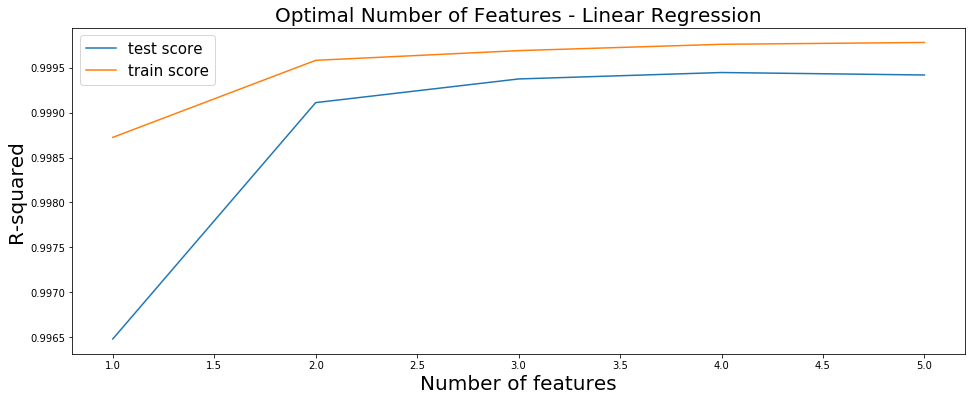

In [313]:
# plotting cross valiidation results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('Number of features', fontsize = '20')
plt.ylabel('R-squared', fontsize = '20')
plt.title("Optimal Number of Features - Linear Regression", fontsize = '20')
plt.legend(['test score', 'train score'], loc='upper left', fontsize= '15');

In [315]:
import sklearn

In [316]:

# final model
n_features_optimal = 5

lm = LinearRegression()
lm.fit(X_train, Y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, Y_train)

# predicting test score after cross validation
Y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(Y_test, Y_pred)
print(r2)

0.9997839092288149


# Section 3.7 Decision Tree Regressor

In [317]:
#Importing Decisino Tree Regressir abd fitting it t the training sets
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [318]:
#Defining prediction variable for Decision tree regressor

y_pred_DT = DTregressor.predict(X_test)

In [319]:
#Printing R squared, RMSE and MAPE from DTRegressor model

print("R-squared of the model in training set is: {}".format(DTregressor.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(DTregressor.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(Y_test, y_pred_DT)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_pred_DT) / Y_test)) * 100))

R-squared of the model in training set is: 1.0
-----Test set statistics-----
R-squared of the model in test set is: 0.9821567961033625
Root mean squared error of the prediction is: 116.95203195232556
Mean absolute percentage error of the prediction is: 1.3711529914619123


In [321]:
dtr = DecisionTreeRegressor()
scores = cross_val_score(dtr, X_train, Y_train, scoring='r2', cv=5)
scores

array([0.97850969, 0.98029821, 0.99149378, 0.99104335, 0.95642131])

In [322]:
# Performing cross validation
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

#specifying the range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 6))}]


# Specifying the model
dtr = DecisionTreeRegressor()
dtr.fit(X_train, Y_train)
rfe = RFE(dtr)             

# GridSearchCV
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fitting the model
model_cv.fit(X_train, Y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=DecisionTreeRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5]}],
             return_train_score=True, scoring='r2', verbose=1)

In [323]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006836,0.000690,0.001902,0.000138,1,{'n_features_to_select': 1},0.768904,0.994029,0.980930,0.990984,...,0.945359,0.088343,5,0.999999,1.0,0.999998,1.0,1.0,0.999999,7.178780e-07
1,0.006567,0.000486,0.002023,0.000193,2,{'n_features_to_select': 2},0.980460,0.975468,0.983205,0.995440,...,0.984518,0.006806,2,1.000000,1.0,1.000000,1.0,1.0,1.000000,0.000000e+00
2,0.004605,0.000648,0.001468,0.000145,3,{'n_features_to_select': 3},0.941476,0.991234,0.996041,0.994217,...,0.981887,0.020464,3,1.000000,1.0,1.000000,1.0,1.0,1.000000,0.000000e+00
3,0.003444,0.000102,0.001360,0.000075,4,{'n_features_to_select': 4},0.966562,0.993279,0.983039,0.989219,...,0.985281,0.010162,1,1.000000,1.0,1.000000,1.0,1.0,1.000000,0.000000e+00
4,0.003090,0.000209,0.001438,0.000232,5,{'n_features_to_select': 5},0.967985,0.961688,0.995842,0.980563,...,0.979657,0.013262,4,1.000000,1.0,1.000000,1.0,1.0,1.000000,0.000000e+00


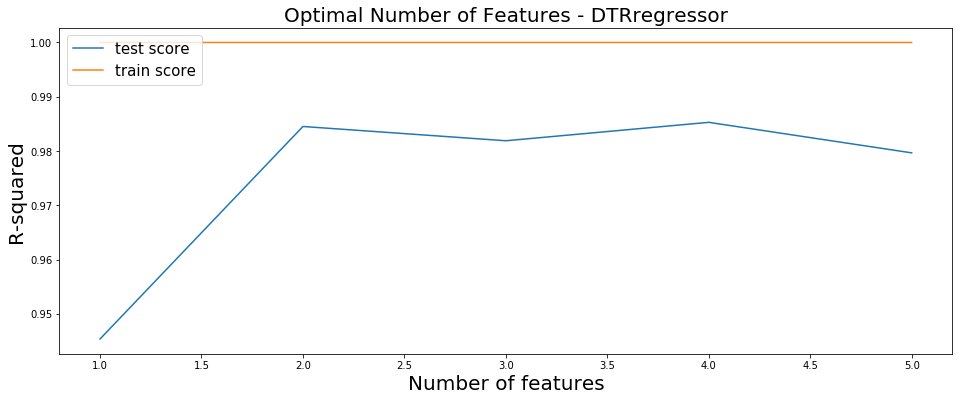

In [324]:
# plotting cross valiidation results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('Number of features', fontsize = '20')
plt.ylabel('R-squared', fontsize = '20')
plt.title("Optimal Number of Features - DTRregressor", fontsize = '20')
plt.legend(['test score', 'train score'], loc='upper left', fontsize='15');

In [325]:
# final model
n_features_optimal = 5

dtr = DecisionTreeRegressor()
dtr.fit(X_train, Y_train)

rfe = RFE(dtr, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, Y_train)

# predicting test score after cross validation
Y_pred = dtr.predict(X_test)
r2 = sklearn.metrics.r2_score(Y_test, Y_pred)
print(r2)

0.9839790930927088


# Section 3.8 Random forest regressor

In [326]:
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor(n_estimators=100)
RFregressor.fit(X_train, Y_train)

RandomForestRegressor()

In [327]:
y_pred_RF = RFregressor.predict(X_test)

In [328]:
#printing the R squared, RMSE and MAPE of the model

print("R-squared of the model in training set is: {}".format(RFregressor.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(RFregressor.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(Y_test, y_pred_RF)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_pred_RF) / Y_test)) * 100))

R-squared of the model in training set is: 0.9990379269004278
-----Test set statistics-----
R-squared of the model in test set is: 0.9938552852797176
Root mean squared error of the prediction is: 68.63129837520685
Mean absolute percentage error of the prediction is: 0.8106700611059898


In [329]:
#Defining the model and printing the cross validation scores 

rfr = RandomForestRegressor(n_estimators=100)
scores = cross_val_score(rfr, X_train, Y_train, scoring='r2', cv=5)
scores

array([0.97453353, 0.99463904, 0.9872453 , 0.97630088, 0.98850796])

In [330]:
# Performing cross validation
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

#specifying the range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 6))}]


# Specifiying the model for gridsearch CV
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, Y_train)
rfe = RFE(rfr)             

# GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, Y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=RandomForestRegressor()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5]}],
             return_train_score=True, scoring='r2', verbose=1)

In [331]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.671702,0.015666,0.007408,0.000565,1,{'n_features_to_select': 1},0.978455,0.997028,0.994870,0.997769,...,0.992527,0.007144,2,0.999465,0.999275,0.998885,0.998892,0.999062,0.999116,0.000225
1,0.572612,0.015702,0.008037,0.001004,2,{'n_features_to_select': 2},0.979074,0.999008,0.994098,0.997551,...,0.993493,0.007391,1,0.999669,0.999502,0.999273,0.999011,0.999324,0.999356,0.000222
2,0.477924,0.003082,0.007580,0.000241,3,{'n_features_to_select': 3},0.975825,0.989928,0.994204,0.996375,...,0.990626,0.007791,3,0.999462,0.999185,0.998938,0.998306,0.999044,0.998987,0.000383
3,0.392402,0.010126,0.007520,0.000159,4,{'n_features_to_select': 4},0.967495,0.987456,0.992595,0.995694,...,0.988194,0.010914,4,0.999105,0.998999,0.998804,0.998142,0.998779,0.998766,0.000335
4,0.280203,0.003736,0.007384,0.000177,5,{'n_features_to_select': 5},0.960799,0.970761,0.992546,0.991938,...,0.982277,0.013881,5,0.999308,0.998235,0.998582,0.997830,0.998252,0.998442,0.000495


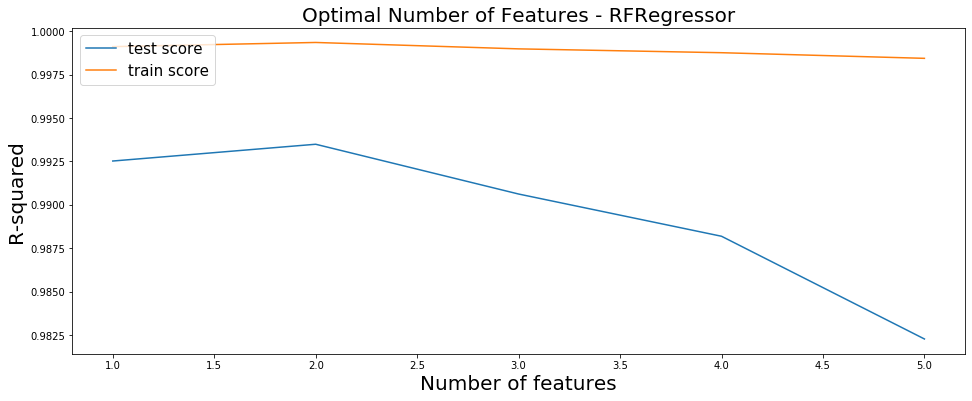

In [332]:
# plotting cross valiidation results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('Number of features', fontsize = '20')
plt.ylabel('R-squared', fontsize = '20')
plt.title("Optimal Number of Features - RFRegressor", fontsize = '20')
plt.legend(['test score', 'train score'], loc='upper left', fontsize='15');

In [333]:
# final model
n_features_optimal = 3

rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, Y_train)

rfe = RFE(rfr, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, Y_train)

# predict prices of X_test
Y_pred = rfr.predict(X_test)
r2 = sklearn.metrics.r2_score(Y_test, Y_pred)
print(r2)

0.9922222751141484


# END OF FILE